__Uploading Tensorflow and Keras__

In [24]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [26]:
import keras as keras

__Importing Packages__

In [27]:
import os
os.getcwd()

'C:\\Users\\kanwa\\BSM'

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
from keras.models import Sequential # https://keras.io/api/models/sequential/

# keras provides layers api to construct the neural network
from keras.layers import Dense, Dropout, Activation, LeakyReLU, ReLU #https://keras.io/api/layers/

from keras import backend
def custom_activation(x):
    return backend.exp(x)

__Reading CSV and Normalizing Variables__

In [30]:
df = pd.read_csv('Project2_training.csv')

In [31]:
# normalize stock and call prices in relation to the option's strike price
df['Stock Price'] = df['Stock Price']/df['Strike Price']
df['Call Price']  = df['Call Price'] /df['Strike Price']

# split data into training and testing sets
n = 3000
n_train =  (int)(0.8 * n)

# select training set and define independent and dependent variable (call price)
train = df[0:n_train]
X_train = train[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_train = train['Call Price'].values

# select testing set and define independent and dependent variable (call price)
test = df[n_train+1:n]
X_test = test[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_test = test['Call Price'].values

In [32]:
df.head()

,Stock Price,Maturity,Dividends,Volatility,Risk-free,Strike Price,Call Price
0,1.467892,1,0,0.992653,0.028574,100,0.747693
1,1.258188,1,0,0.995702,0.026482,100,0.580628
2,0.600640,1,0,0.984955,0.029314,100,0.142689
3,1.082254,1,0,0.048974,0.029928,100,0.111967
4,0.992677,1,0,0.120462,0.020081,100,0.053918


## Part A: Question 1

### Shallow Neural Network

Epoch 1/100
38/38 - 1s - loss: 0.1616 - val_loss: 0.0552 - 664ms/epoch - 17ms/step
Epoch 2/100
38/38 - 0s - loss: 0.0523 - val_loss: 0.0497 - 70ms/epoch - 2ms/step
Epoch 3/100
38/38 - 0s - loss: 0.0476 - val_loss: 0.0444 - 66ms/epoch - 2ms/step
Epoch 4/100
38/38 - 0s - loss: 0.0414 - val_loss: 0.0376 - 66ms/epoch - 2ms/step
Epoch 5/100
38/38 - 0s - loss: 0.0338 - val_loss: 0.0292 - 63ms/epoch - 2ms/step
Epoch 6/100
38/38 - 0s - loss: 0.0252 - val_loss: 0.0207 - 62ms/epoch - 2ms/step
Epoch 7/100
38/38 - 0s - loss: 0.0169 - val_loss: 0.0133 - 64ms/epoch - 2ms/step
Epoch 8/100
38/38 - 0s - loss: 0.0107 - val_loss: 0.0083 - 61ms/epoch - 2ms/step
Epoch 9/100
38/38 - 0s - loss: 0.0068 - val_loss: 0.0054 - 65ms/epoch - 2ms/step
Epoch 10/100
38/38 - 0s - loss: 0.0046 - val_loss: 0.0039 - 63ms/epoch - 2ms/step
Epoch 11/100
38/38 - 0s - loss: 0.0035 - val_loss: 0.0031 - 63ms/epoch - 2ms/step
Epoch 12/100
38/38 - 0s - loss: 0.0029 - val_loss: 0.0026 - 62ms/epoch - 2ms/step
Epoch 13/100
38/38 - 0s

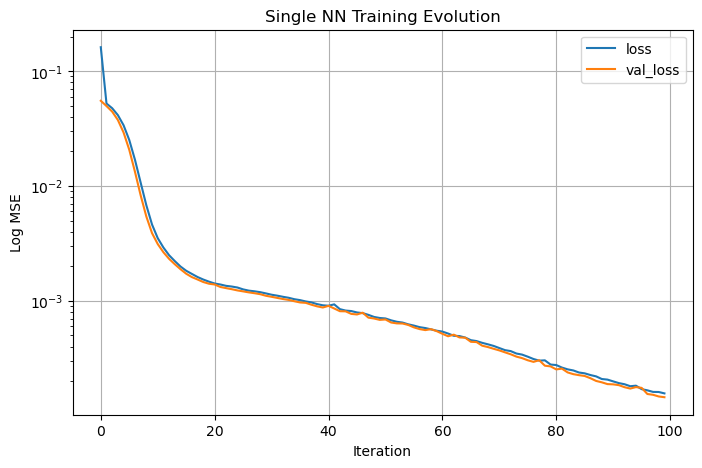

In [133]:
# for this NN we will define it with 300 neurons
nodes = 300
# initialize the mode as Sequential class - the next steps we will add layers to it 
model = Sequential()

# to add a layer we call the add method from model (Sequential) and pass as argument the Dense class
# https://keras.io/api/layers/core_layers/dense/
model.add(Dense(nodes, activation='relu', input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

# since we want to predict a single value we add one additional layer with one neuron 
model.add(Dense(1))
# we will use our customized activation function
model.add(Activation(custom_activation))


# https://keras.io/api/models/model_training_apis/

# compile the model
model.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'

# fit the model
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.1, verbose=2,
                          validation_data=(X_test, y_test))
print()
# print the model parameters
print(model.summary())

# plot the model learning history
pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('Single NN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

__Assessing Accuracy of Shallow Neural Network__

In [139]:
def CheckAccuracy_dict(y, y_hat):
    stats = dict()

    stats['diff'] = y - y_hat

    stats['mse'] = np.mean(stats['diff'] ** 2)
    print
    "Mean Squared Error:      ", stats['mse']

    stats['rmse'] = np.sqrt(stats['mse'])
    print
    "Root Mean Squared Error: ", stats['rmse']

    stats['mae'] = np.mean(abs(stats['diff']))
    print
    "Mean Absolute Error:     ", stats['mae']

    stats['mpe'] = np.sqrt(stats['mse']) / np.mean(y)
    print
    "Mean Percent Error:      ", stats['mpe']

    return stats

def CheckAccuracy_plots(y, y_hat):
    stats = dict()

    stats['diff'] = y - y_hat
  
    # plots
    # mpl.rcParams['agg.path.chunksize'] = 100000
    plt.figure(figsize=(14, 10))
    plt.scatter(y, y_hat, color='black', linewidth=0.3, alpha=0.4, s=0.5)
    plt.xlabel('Actual Price', fontsize=20, fontname='Times New Roman')
    plt.ylabel('Predicted Price', fontsize=20, fontname='Times New Roman')
    plt.show()

    plt.figure(figsize=(14, 10))
    plt.hist(stats['diff'], bins=50, edgecolor='black', color='white')
    plt.xlabel('Diff')
    plt.ylabel('Density')
    plt.show()

19/19 [==============================] - 0s 919us/step


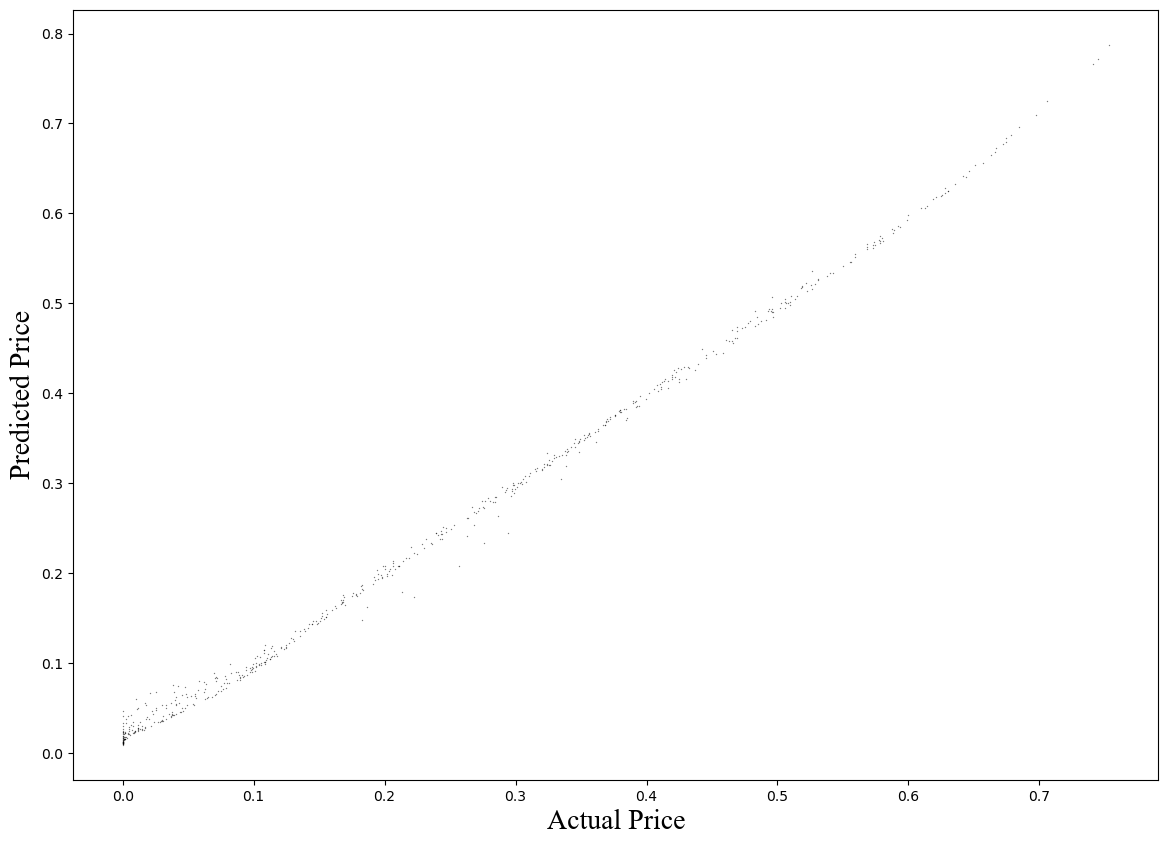

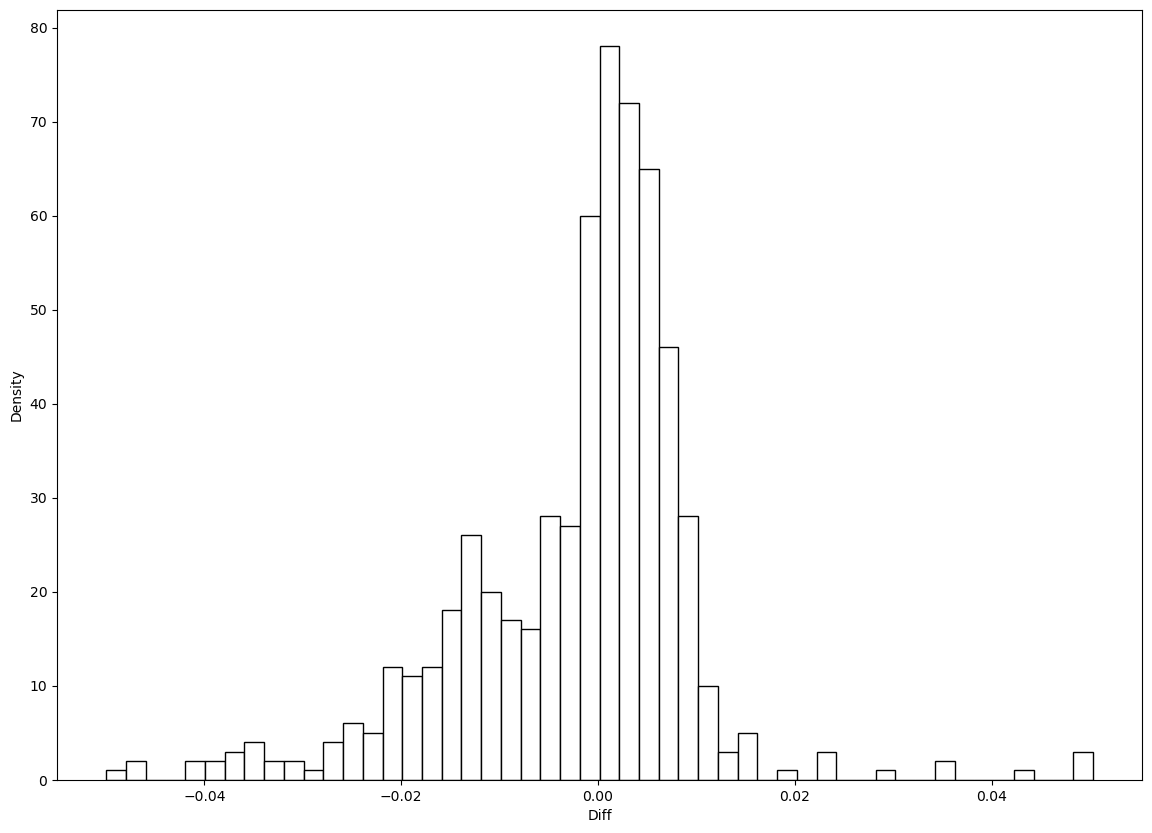

{'diff': array([ 7.47516095e-03,  1.22212819e-04,  1.80324437e-03, -5.95354624e-03,
        -8.64059542e-03,  2.37918755e-03,  3.05335081e-03, -6.46816227e-03,
        -8.68317777e-04,  9.54249167e-03,  3.08642137e-03, -1.31696866e-03,
         8.69911892e-04,  1.33939614e-03,  4.32795540e-03, -1.02697490e-02,
         1.09272463e-02, -2.09576183e-02, -1.70483371e-03, -7.26692759e-03,
         1.93662970e-03, -1.29186863e-02,  1.04981191e-03,  4.82385478e-03,
        -5.12170819e-03, -2.44959205e-04, -5.01457338e-03, -3.23871092e-03,
         5.53160090e-03,  3.32411041e-03,  2.03489024e-03,  4.83731800e-03,
         1.93715103e-04, -5.62812423e-03,  5.71587066e-03,  2.23599385e-02,
        -1.55055217e-02,  6.16134603e-03, -3.22941993e-04, -4.97700210e-03,
        -1.35973260e-02,  5.55246184e-03,  7.83602679e-03, -1.39885553e-02,
        -2.59696419e-02,  7.86942780e-03, -1.39095797e-02, -1.41300603e-02,
         3.13794616e-03,  6.39736300e-03, -1.37855364e-03, -1.21107338e-02,
    

In [142]:
y1_test_hat = model.predict(X_test)

y1_test_hat = np.squeeze(y1_test_hat)

CheckAccuracy_plots(y_test, y1_test_hat)
CheckAccuracy_dict(y_test, y1_test_hat)

In [143]:
shallow_network = CheckAccuracy_dict(y_test, y1_test_hat)
shallow_network.pop('diff')
shallow_network = {'Shallow Neural Network': shallow_network}
shallow_network

{'Shallow Neural Network': {'mse': 0.0001448215076284287,
  'rmse': 0.01203418080421051,
  'mae': 0.008202134036193534,
  'mpe': 0.049751165320815825}}

### Deep Neural Network (with 3 layers of 100 neurons each)

In [149]:
def NeuralNetwork(layers, nodes_num, act, opt, epoch_nums):   
    # initialize our new model as sequential class
    model = Sequential()
    
    # add the first layer of nodes_num neurons - for the first layer you must declare the number of features through input_dim arguments
    model.add(Dense(nodes_num, activation= act, input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

    for i in range(layers - 1): 
        model.add(Dense(nodes_num, activation = act))
    
    # output layer is the same as the single NN
    model.add(Dense(1))
    model.add(Activation(custom_activation))
    
    # compile and fit the model
    model.compile(loss='mse', optimizer=opt) # optimizer = 'rmsprop', 'sgd', 'adam'
    history = model.fit(X_train, y_train, batch_size=512, epochs=epoch_nums, validation_split=0.1, verbose=2,
                              validation_data=(X_test, y_test))
    print()
    print(model.summary())
    
    pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
    plt.title('DNN Training Evolution')
    plt.ylabel('Log MSE')
    plt.xlabel('Iteration')
    plt.grid(True)

    return model

__Assessing Accuracy of Deep Neural Network (with 3 layers of 100 neurons each)__

Epoch 1/100
5/5 - 1s - loss: 0.4512 - val_loss: 0.2451 - 1s/epoch - 244ms/step
Epoch 2/100
5/5 - 0s - loss: 0.1745 - val_loss: 0.0973 - 38ms/epoch - 8ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0768 - val_loss: 0.0598 - 39ms/epoch - 8ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0593 - val_loss: 0.0591 - 36ms/epoch - 7ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0614 - val_loss: 0.0616 - 37ms/epoch - 7ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0632 - val_loss: 0.0612 - 37ms/epoch - 7ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0615 - val_loss: 0.0576 - 36ms/epoch - 7ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0568 - val_loss: 0.0520 - 37ms/epoch - 7ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0504 - val_loss: 0.0461 - 36ms/epoch - 7ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0442 - val_loss: 0.0405 - 36ms/epoch - 7ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0384 - val_loss: 0.0346 - 37ms/epoch - 7ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0323 - val_loss: 0.0282 - 38ms/epoch - 8ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0257 - val_loss: 

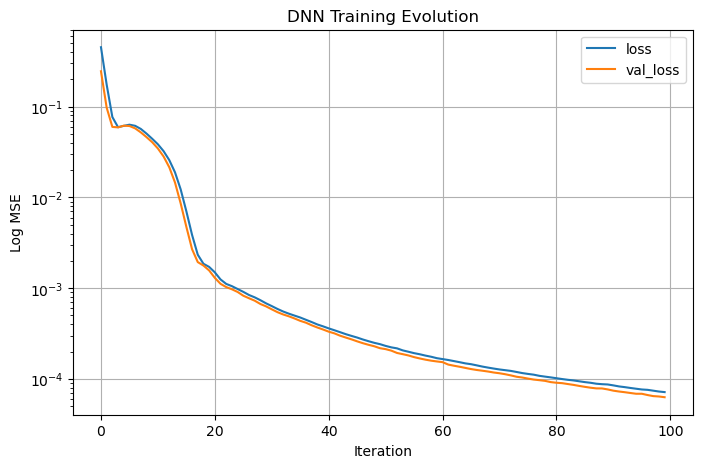

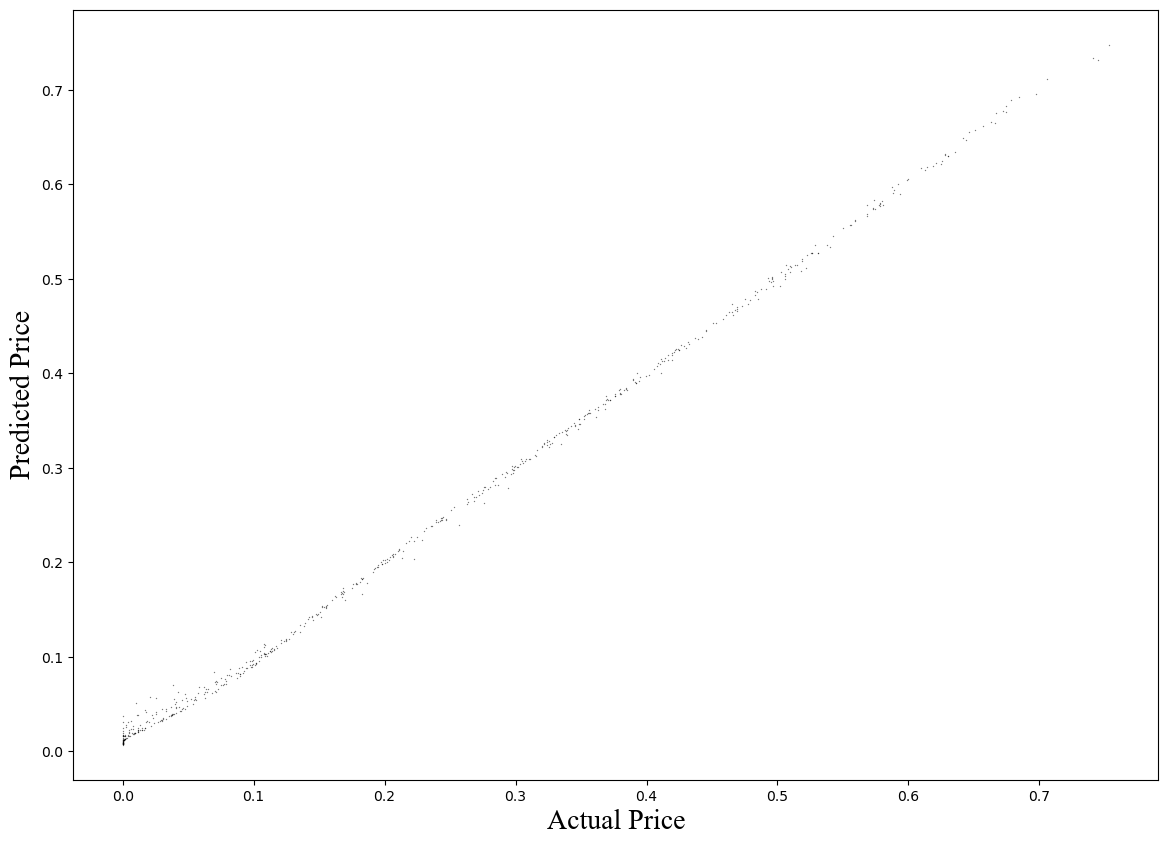

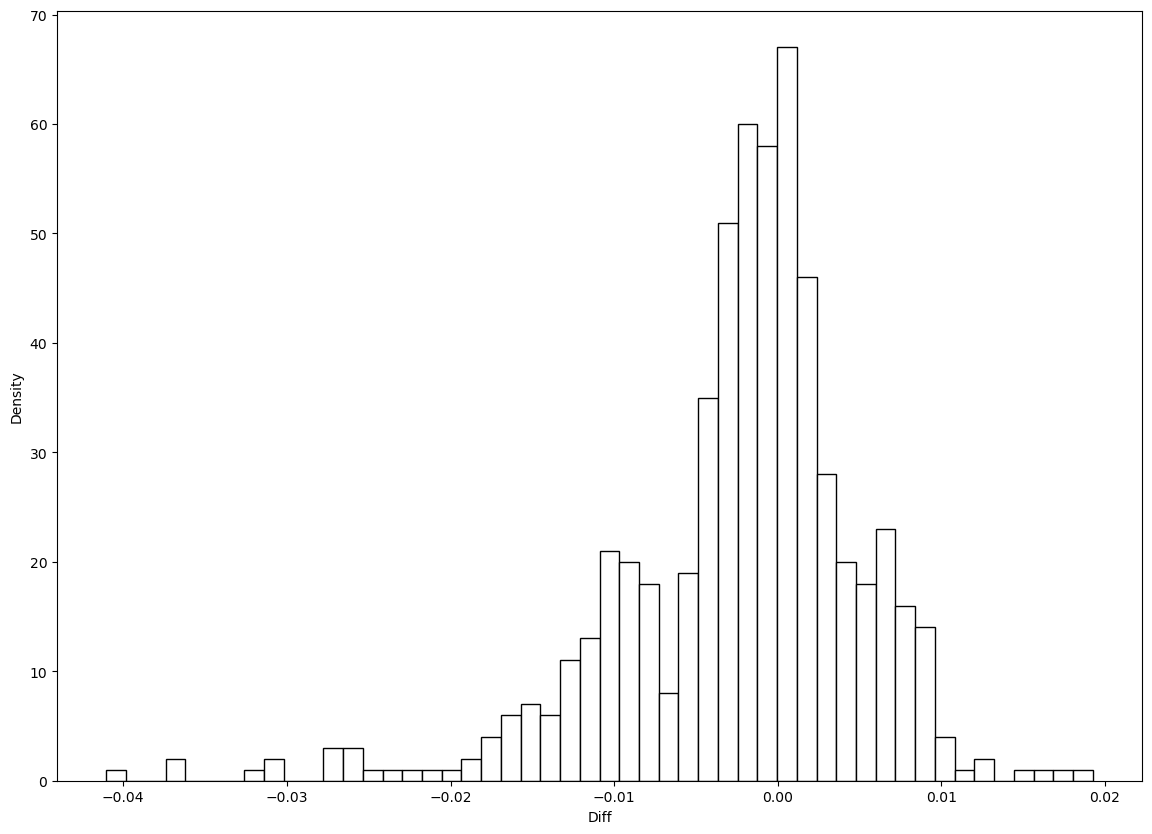

{'diff': array([ 2.58540451e-03,  1.68698376e-03, -2.34744428e-03,  1.14401095e-03,
        -1.04044161e-02, -1.27129892e-03,  2.03059471e-03,  4.36765668e-03,
         3.65123422e-03,  1.07076430e-03, -4.12547242e-03,  1.64087549e-04,
        -3.54285838e-03, -2.38692234e-03,  2.96116129e-03, -7.63470493e-03,
         6.53640711e-04, -1.44490258e-02, -3.37769767e-03, -3.85533654e-03,
        -4.71012266e-03, -5.61381297e-03, -8.02416079e-03,  9.18245933e-03,
         1.88899758e-03,  6.50186935e-03, -3.05741016e-03, -3.27989773e-03,
         5.69933582e-03, -3.35861335e-03, -1.12493079e-03,  7.91783505e-03,
        -1.20559334e-03, -3.00237944e-03, -5.82644960e-03,  1.73969677e-03,
        -1.14288863e-02,  6.30064795e-04, -1.91560790e-03, -1.99033628e-03,
        -1.07992539e-02,  3.68290255e-03,  5.88454837e-03, -9.93056119e-03,
         6.81112456e-03,  5.77795297e-03, -1.10524311e-02, -1.05909433e-02,
         2.02552977e-03, -2.54327411e-03, -9.27312924e-03, -8.12318304e-03,
    

In [156]:
y2_test_hat = NeuralNetwork(3, 100, 'relu', 'adam', 100).predict(X_test)

y2_test_hat = np.squeeze(y2_test_hat)

CheckAccuracy_plots(y_test, y2_test_hat)
CheckAccuracy_dict(y_test, y2_test_hat)

In [157]:
deep_3_100_relu = CheckAccuracy_dict(y_test, y2_test_hat)
deep_3_100_relu.pop('diff')
deep_3_100_relu = {'DNN (3, 100, Relu)': deep_3_100_relu}
deep_3_100_relu

{'DNN (3, 100, Relu)': {'mse': 6.289479716258164e-05,
  'rmse': 0.007930624008398182,
  'mae': 0.0054283973012301265,
  'mpe': 0.03278642664243514}}

### Deep Neural Network (with 5 layers of 60 neurons each)

__Assessing Accuracy of DNN with 5 layers of 60 neurons each__

Epoch 1/100
5/5 - 1s - loss: 0.5038 - val_loss: 0.3719 - 1s/epoch - 251ms/step
Epoch 2/100
5/5 - 0s - loss: 0.2996 - val_loss: 0.2058 - 39ms/epoch - 8ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1536 - val_loss: 0.0948 - 39ms/epoch - 8ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0720 - val_loss: 0.0537 - 37ms/epoch - 7ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0509 - val_loss: 0.0506 - 37ms/epoch - 7ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0530 - val_loss: 0.0541 - 36ms/epoch - 7ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0559 - val_loss: 0.0543 - 37ms/epoch - 7ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0546 - val_loss: 0.0511 - 37ms/epoch - 7ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0505 - val_loss: 0.0464 - 36ms/epoch - 7ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0455 - val_loss: 0.0425 - 37ms/epoch - 7ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0418 - val_loss: 0.0402 - 39ms/epoch - 8ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0392 - val_loss: 0.0375 - 35ms/epoch - 7ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0359 - val_loss: 

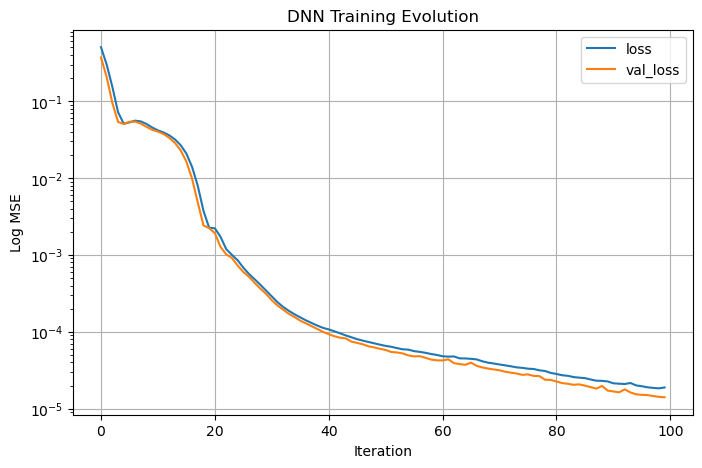

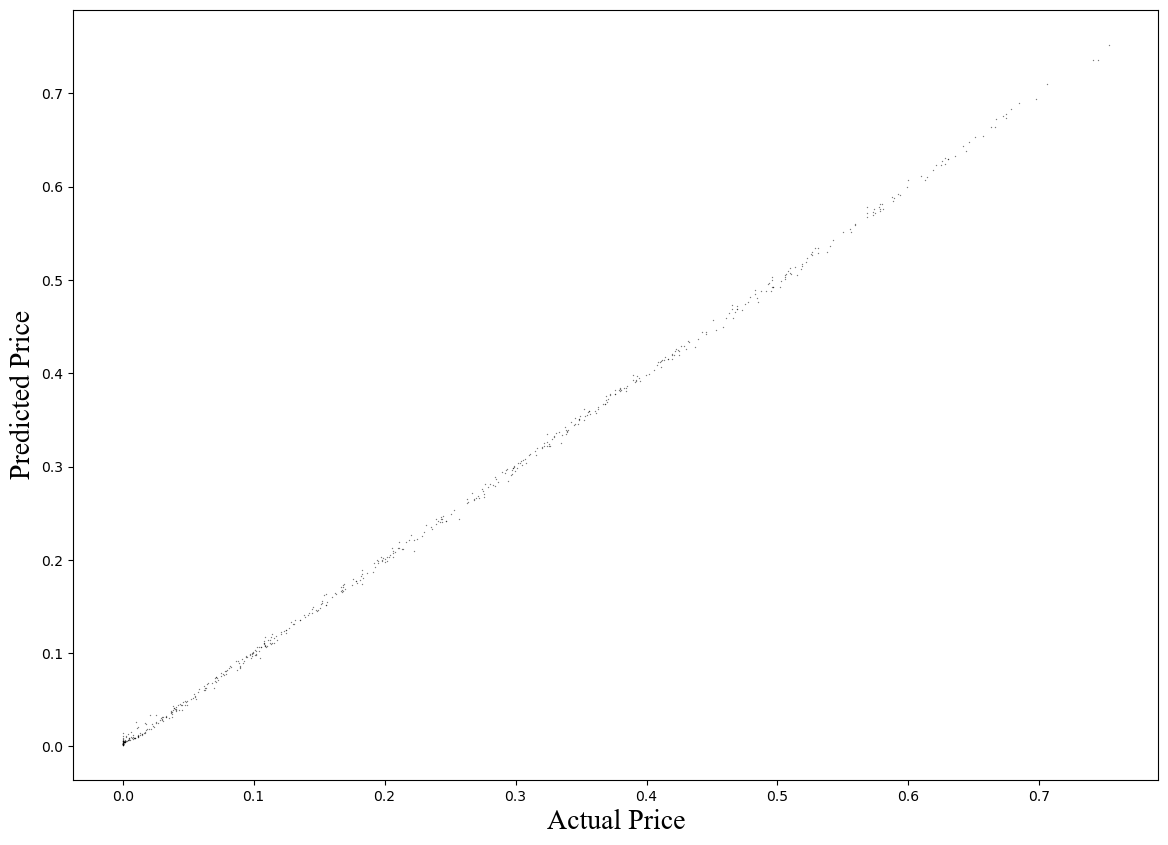

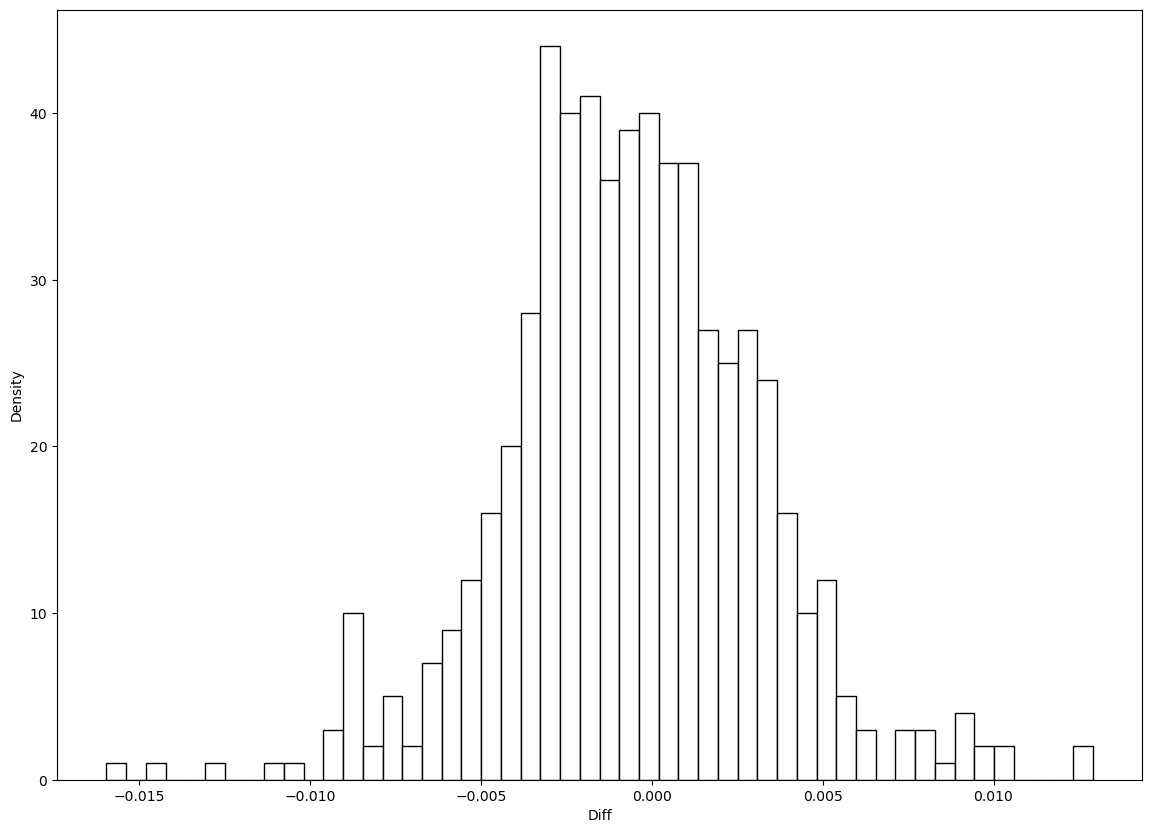

{'diff': array([-1.20351375e-03, -1.31247098e-03, -3.15270303e-03,  1.22564324e-03,
        -5.39095019e-03, -8.06067292e-05, -9.23784219e-03, -2.80619446e-03,
         7.66905850e-04,  2.22333932e-03,  4.34944380e-03, -6.45879969e-04,
        -3.30810549e-03, -2.44931350e-03,  1.66833655e-03, -2.05749716e-03,
        -1.77460076e-05, -9.78532518e-04, -5.10177813e-04, -4.62846839e-03,
         1.47907464e-03,  2.37955733e-03, -3.02798025e-03,  5.09551382e-04,
         4.76950007e-03,  1.02494010e-03, -1.07937042e-03, -4.52837662e-03,
         1.06821987e-04, -2.45447050e-03,  1.34559233e-03,  3.93059724e-03,
         7.37473376e-04,  3.42752437e-04, -4.50215360e-03, -2.44636724e-03,
        -2.03246781e-03,  1.71516735e-03, -3.39270041e-03,  1.18622062e-03,
        -2.70752434e-03, -8.74468588e-04, -8.82456357e-04, -3.06482319e-04,
         5.19405054e-03, -1.81274715e-04, -3.29701231e-03, -1.47127335e-03,
         2.42118540e-03, -1.82509774e-03, -1.40054775e-03, -5.13186434e-03,
    

In [158]:
y3_test_hat = NeuralNetwork(5, 60, 'relu', 'adam', 100).predict(X_test)

y3_test_hat = np.squeeze(y3_test_hat)

CheckAccuracy_plots(y_test, y3_test_hat)
CheckAccuracy_dict(y_test, y3_test_hat)

In [159]:
deep_5_60_relu = CheckAccuracy_dict(y_test, y3_test_hat)
deep_5_60_relu.pop('diff')
deep_5_60_relu = {'DNN (5, 60, Relu)': deep_5_60_relu}
deep_5_60_relu

{'DNN (5, 60, Relu)': {'mse': 1.4111921834074069e-05,
  'rmse': 0.003756583798356436,
  'mae': 0.0028873385007988682,
  'mpe': 0.015530298624742188}}

### Comparison of Key Accuracy Stats Across Neural Networks of Varying Layers

In [160]:
question1 = {**shallow_network, **deep_3_100_relu, **deep_5_60_relu}

df = pd.DataFrame.from_dict(question1)
df

,Shallow Neural Network,"DNN (3, 100, Relu)","DNN (5, 60, Relu)"
mse,0.000145,0.000063,0.000014
rmse,0.012034,0.007931,0.003757
mae,0.008202,0.005428,0.002887
mpe,0.049751,0.032786,0.015530


## Part A: Question 2

### DNN with 5 Layers of 60 Neurons Each (Activation: tanh)

Epoch 1/100
5/5 - 1s - loss: 0.0907 - val_loss: 0.0517 - 1s/epoch - 252ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0589 - val_loss: 0.0618 - 40ms/epoch - 8ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0626 - val_loss: 0.0563 - 38ms/epoch - 8ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0527 - val_loss: 0.0415 - 37ms/epoch - 7ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0380 - val_loss: 0.0376 - 37ms/epoch - 7ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0384 - val_loss: 0.0337 - 36ms/epoch - 7ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0319 - val_loss: 0.0303 - 37ms/epoch - 7ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0293 - val_loss: 0.0248 - 38ms/epoch - 8ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0226 - val_loss: 0.0204 - 36ms/epoch - 7ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0178 - val_loss: 0.0134 - 39ms/epoch - 8ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0115 - val_loss: 0.0075 - 37ms/epoch - 7ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0061 - val_loss: 0.0038 - 36ms/epoch - 7ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0031 - val_loss: 

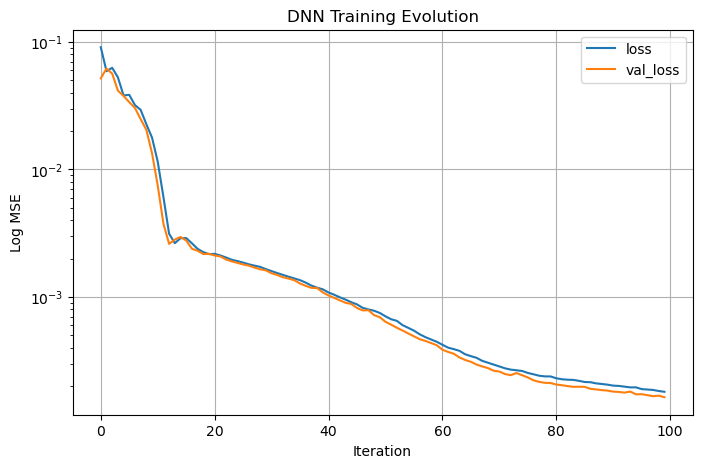

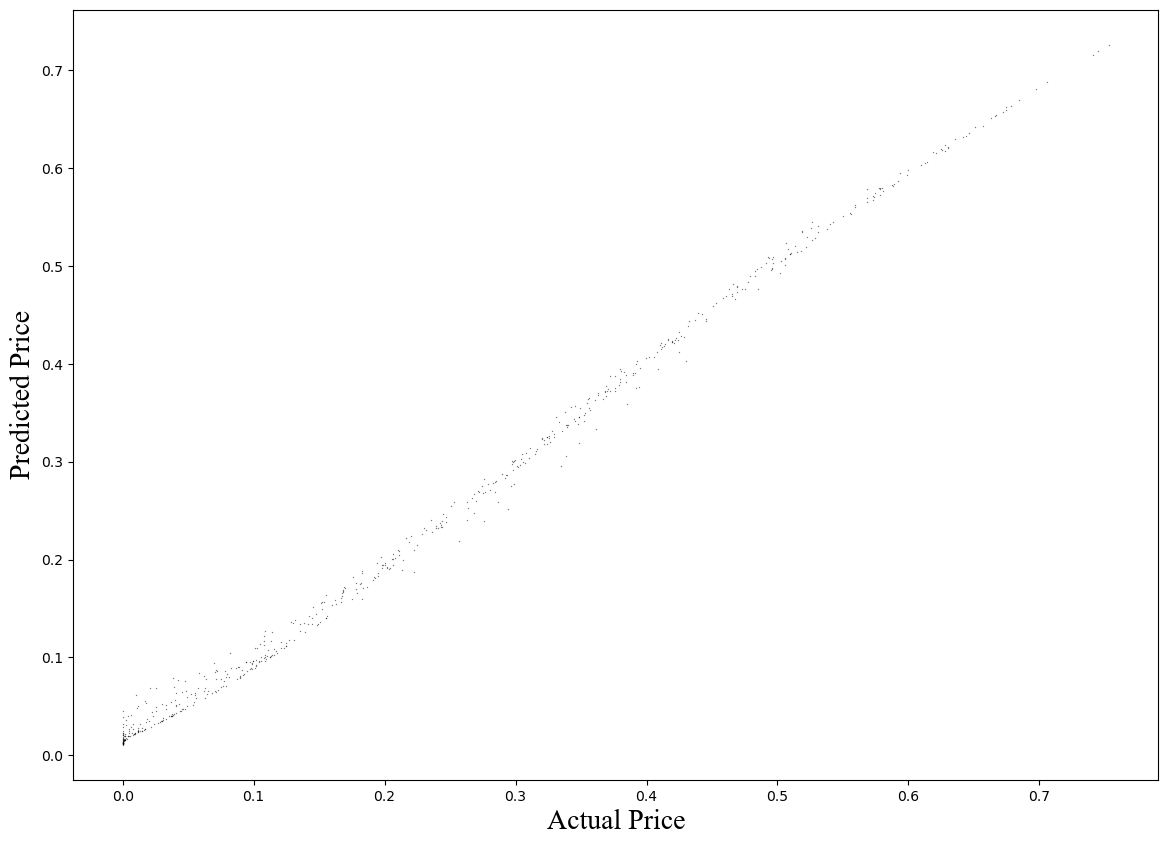

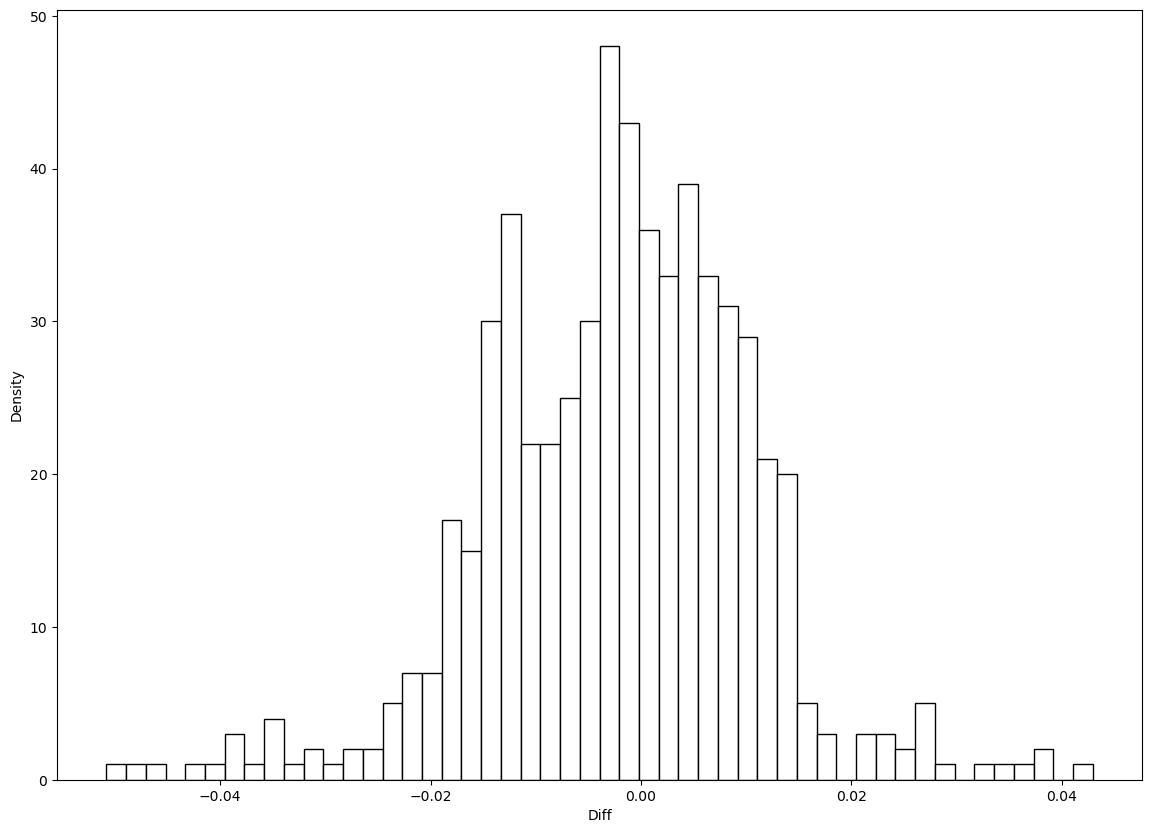

{'diff': array([ 1.61731178e-02, -4.87301404e-03, -8.65579126e-03, -3.27898897e-03,
         1.47180476e-02,  2.19405553e-03, -1.02812811e-02, -1.38457272e-02,
        -6.48140638e-03,  9.11023599e-05, -2.11476934e-03, -4.20299576e-03,
         3.72992156e-03,  8.53445162e-03, -4.08905491e-03, -1.16474312e-02,
        -1.69645122e-03, -1.80771121e-02,  1.17305301e-02, -3.16713089e-04,
         4.16113465e-03, -1.00091936e-02, -1.69103789e-02, -1.35090330e-03,
        -2.82530141e-03,  1.79936835e-03, -5.26028235e-03,  7.48413487e-03,
         4.26245037e-03, -2.66135822e-03,  7.56703574e-03,  8.56134915e-03,
         1.19758993e-02, -5.53537195e-03, -9.83393394e-04,  2.31378835e-02,
        -1.43734135e-02,  1.40823323e-03,  3.53678658e-03, -4.73556603e-03,
        -1.36968117e-02,  4.67302511e-03,  1.02434062e-02, -1.30261899e-02,
         2.48332446e-02,  8.66632700e-03, -1.39663504e-02, -1.35029524e-02,
         5.84982338e-03, -2.09692659e-04,  1.04155962e-02,  1.49268272e-02,
    

In [162]:
y4_test_hat = NeuralNetwork(5, 60, 'tanh', 'adam', 100).predict(X_test)

y4_test_hat = np.squeeze(y4_test_hat)

CheckAccuracy_plots(y_test, y4_test_hat)
CheckAccuracy_dict(y_test, y4_test_hat)

In [163]:
deep_5_60_tanh = CheckAccuracy_dict(y_test, y4_test_hat)
deep_5_60_tanh.pop('diff')
deep_5_60_tanh = {'DNN (5, 60, tanh)': deep_5_60_tanh}
deep_5_60_tanh

{'DNN (5, 60, tanh)': {'mse': 0.000163906865307128,
  'rmse': 0.012802611659623516,
  'mae': 0.009687886170832431,
  'mpe': 0.052927977365379124}}

### DNN with 5 Layers of 60 Neurons Each (Activation: sigmoid)

Epoch 1/100
5/5 - 1s - loss: 0.6390 - val_loss: 0.2498 - 1s/epoch - 266ms/step
Epoch 2/100
5/5 - 0s - loss: 0.1627 - val_loss: 0.0817 - 39ms/epoch - 8ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0625 - val_loss: 0.0464 - 38ms/epoch - 8ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0429 - val_loss: 0.0400 - 38ms/epoch - 8ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0399 - val_loss: 0.0398 - 37ms/epoch - 7ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0406 - val_loss: 0.0406 - 37ms/epoch - 7ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0416 - val_loss: 0.0413 - 36ms/epoch - 7ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0422 - val_loss: 0.0416 - 36ms/epoch - 7ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0424 - val_loss: 0.0416 - 37ms/epoch - 7ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0423 - val_loss: 0.0414 - 37ms/epoch - 7ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0421 - val_loss: 0.0411 - 37ms/epoch - 7ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0417 - val_loss: 0.0408 - 37ms/epoch - 7ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0413 - val_loss: 

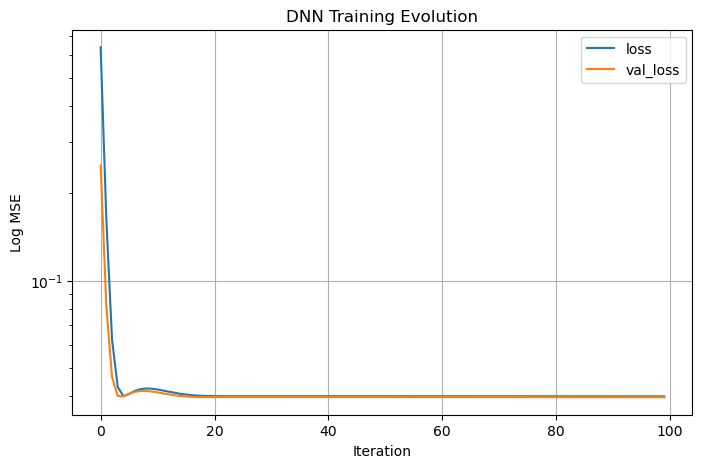

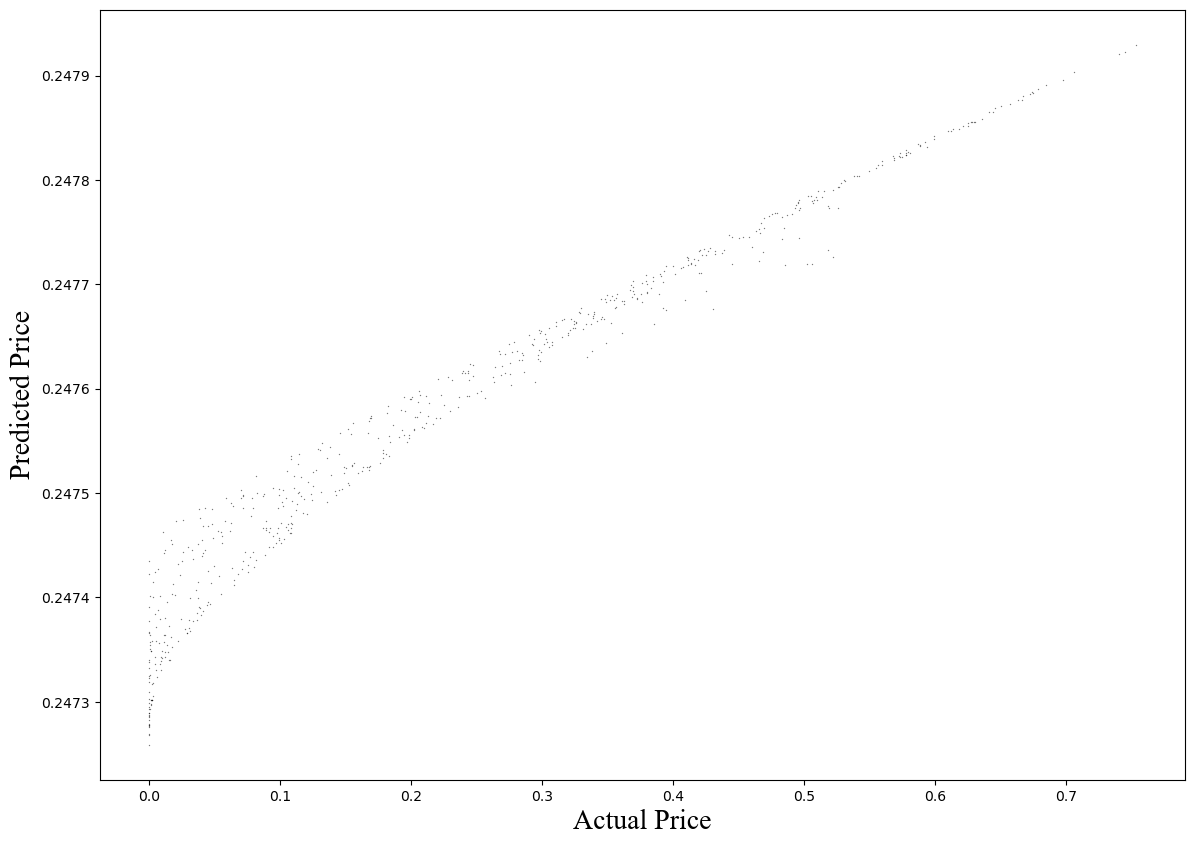

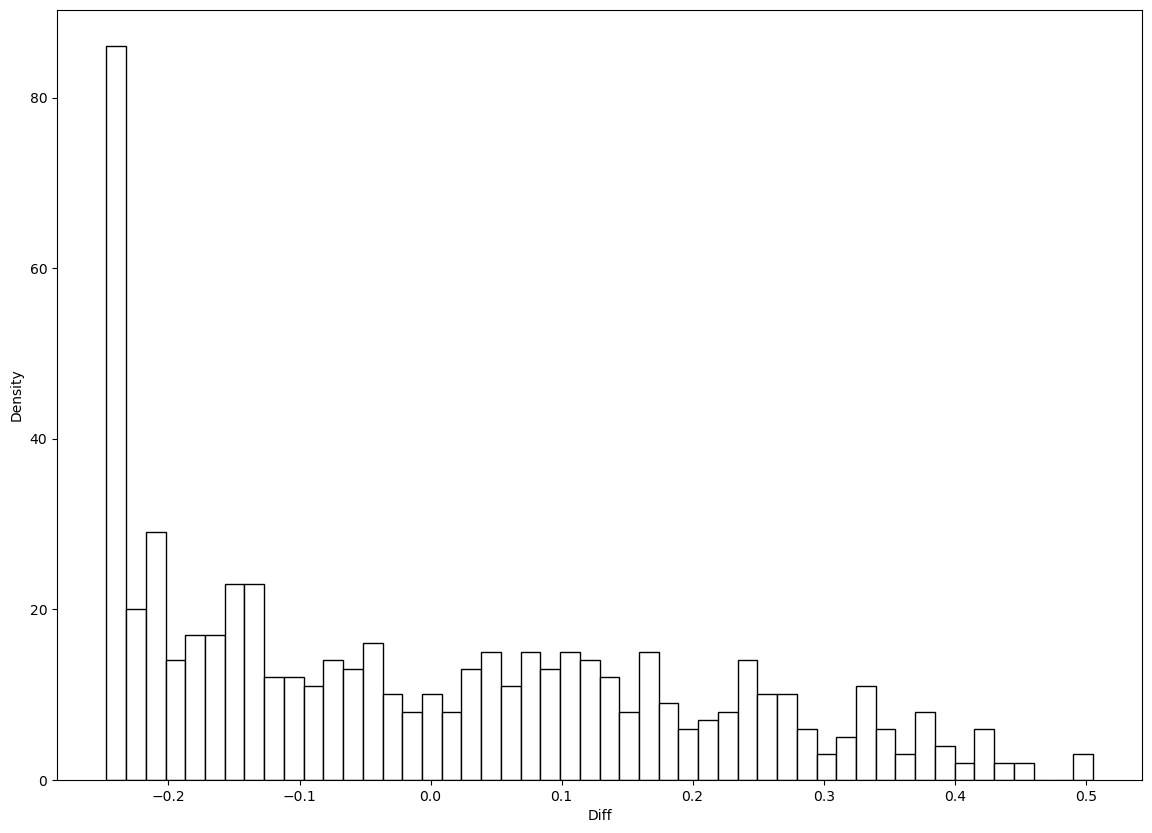

{'diff': array([ 0.14432419,  0.13186873,  0.10841619, -0.18550738,  0.43040248,
         0.11903191,  0.32079506, -0.1393275 ,  0.22970434,  0.32665646,
         0.25521233,  0.16006395,  0.08146892, -0.05297319,  0.28282604,
        -0.24727581,  0.25807761, -0.23390358,  0.41509933, -0.07914742,
         0.01500571, -0.2070536 ,  0.24495677, -0.07816815, -0.19180327,
        -0.16981839, -0.21653523,  0.02920054, -0.17953217,  0.17388128,
         0.0275942 , -0.15814933, -0.05472566, -0.21883114,  0.24780113,
         0.01556091, -0.24226385,  0.21964024,  0.06889112, -0.21719207,
        -0.24422942, -0.14862331, -0.13024438, -0.23922093,  0.49272686,
        -0.13864096, -0.24563574, -0.24153218, -0.06647335,  0.33168456,
         0.39821303,  0.43646923, -0.16929237, -0.12689467,  0.08971962,
         0.18939513,  0.24829004, -0.1723622 , -0.22236422, -0.04091558,
        -0.24728558,  0.34434506, -0.23246654, -0.24534928, -0.20474169,
        -0.24740047, -0.17681145, -0.192416

In [164]:
y5_test_hat = NeuralNetwork(5, 60, 'sigmoid', 'adam', 100).predict(X_test)

y5_test_hat = np.squeeze(y5_test_hat)

CheckAccuracy_plots(y_test, y5_test_hat)
CheckAccuracy_dict(y_test, y5_test_hat)

In [165]:
deep_5_60_sig = CheckAccuracy_dict(y_test, y5_test_hat)
deep_5_60_sig.pop('diff')
deep_5_60_sig = {'DNN (5, 60, sig)': deep_5_60_sig}
deep_5_60_sig

{'DNN (5, 60, sig)': {'mse': 0.039555942628229215,
  'rmse': 0.19888675830288255,
  'mae': 0.17243377567980628,
  'mpe': 0.8222286297199264}}

### Comparison of Key Accuracy Stats Across Neural Networks Using Varying Activation Functions

In [166]:
question2 = {**deep_5_60_relu, **deep_5_60_tanh, **deep_5_60_sig}

df = pd.DataFrame.from_dict(question2)
df

,"DNN (5, 60, Relu)","DNN (5, 60, tanh)","DNN (5, 60, sig)"
mse,0.000014,0.000164,0.039556
rmse,0.003757,0.012803,0.198887
mae,0.002887,0.009688,0.172434
mpe,0.015530,0.052928,0.822229


## Part A: Question 3

### DNN with 5 Layers of 60 Neurons Each (Activation: Relu, Nodes/Layer = 10)

Epoch 1/100
5/5 - 1s - loss: 0.5229 - val_loss: 0.4871 - 1s/epoch - 254ms/step
Epoch 2/100
5/5 - 0s - loss: 0.4565 - val_loss: 0.4227 - 37ms/epoch - 7ms/step
Epoch 3/100
5/5 - 0s - loss: 0.3948 - val_loss: 0.3651 - 36ms/epoch - 7ms/step
Epoch 4/100
5/5 - 0s - loss: 0.3398 - val_loss: 0.3125 - 35ms/epoch - 7ms/step
Epoch 5/100
5/5 - 0s - loss: 0.2894 - val_loss: 0.2642 - 32ms/epoch - 6ms/step
Epoch 6/100
5/5 - 0s - loss: 0.2432 - val_loss: 0.2205 - 33ms/epoch - 7ms/step
Epoch 7/100
5/5 - 0s - loss: 0.2022 - val_loss: 0.1819 - 34ms/epoch - 7ms/step
Epoch 8/100
5/5 - 0s - loss: 0.1660 - val_loss: 0.1485 - 32ms/epoch - 6ms/step
Epoch 9/100
5/5 - 0s - loss: 0.1353 - val_loss: 0.1205 - 32ms/epoch - 6ms/step
Epoch 10/100
5/5 - 0s - loss: 0.1095 - val_loss: 0.0975 - 32ms/epoch - 6ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0887 - val_loss: 0.0790 - 31ms/epoch - 6ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0721 - val_loss: 0.0645 - 32ms/epoch - 6ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0593 - val_loss: 

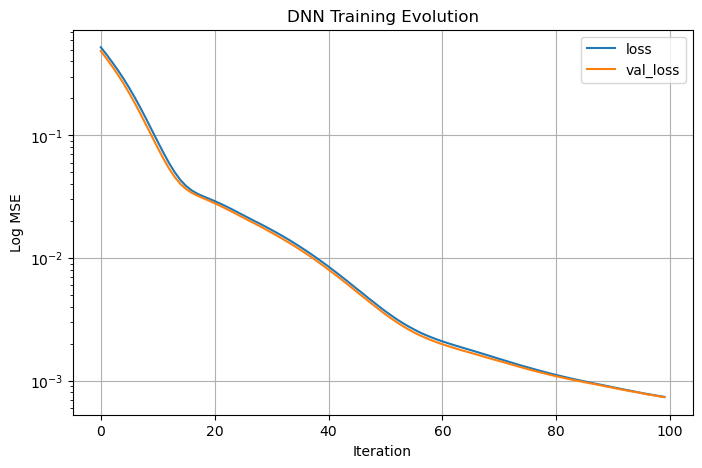

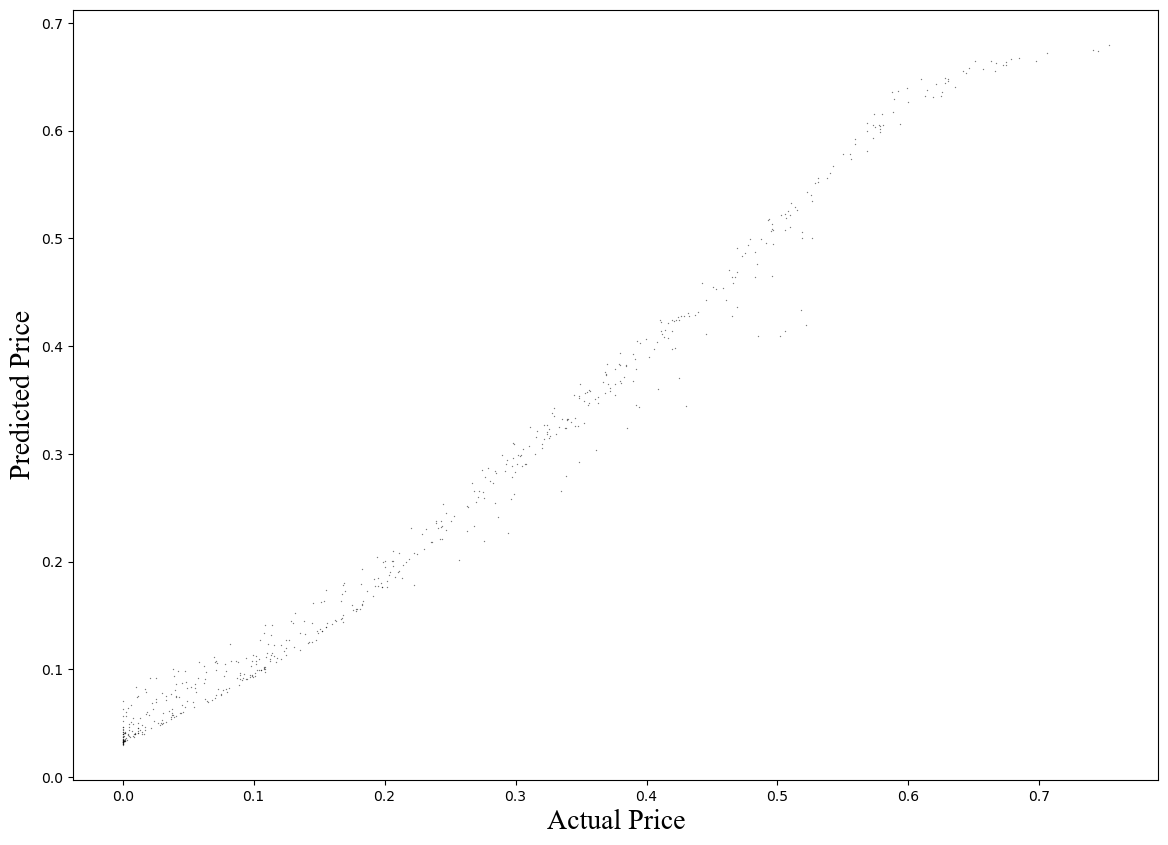

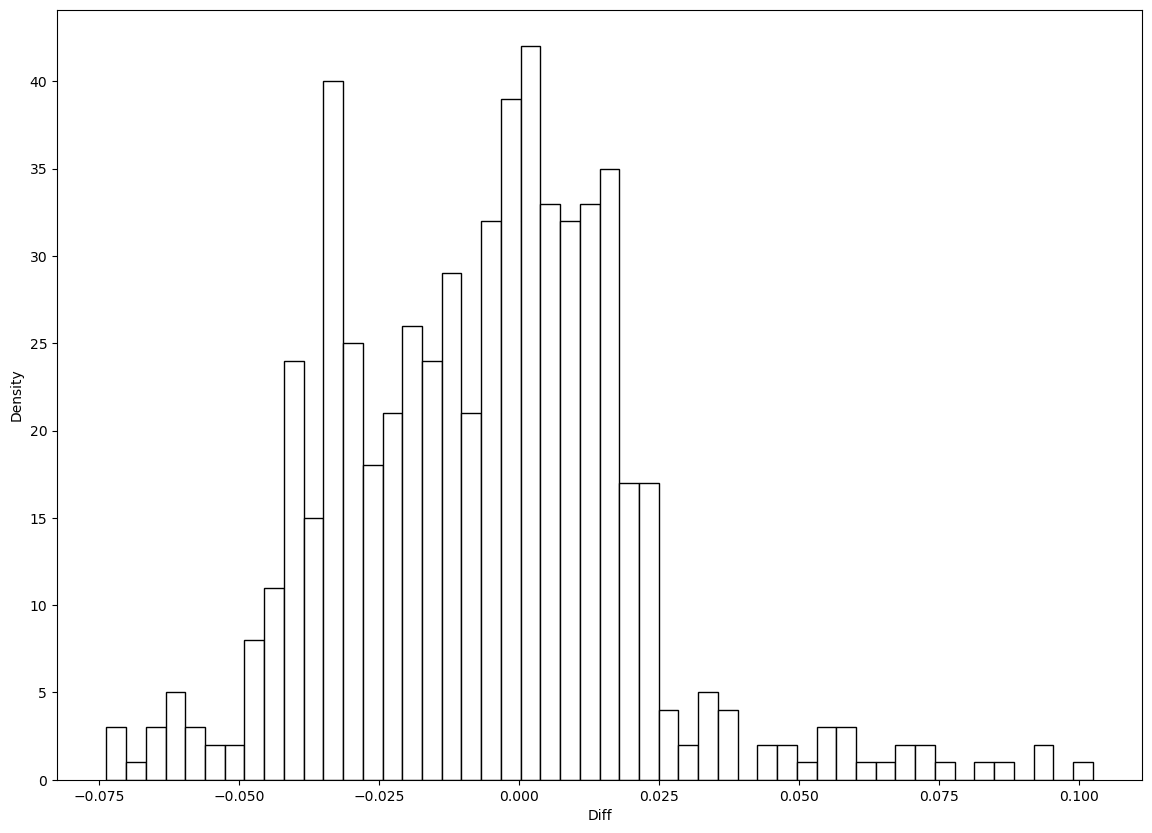

{'diff': array([ 4.66146403e-02, -1.42669743e-02,  8.62961533e-03, -2.51402143e-02,
         1.21277490e-02, -1.35890037e-04, -1.20464727e-02, -2.59854648e-02,
        -1.67512569e-02, -2.90404294e-02, -1.90314616e-02,  4.38445403e-03,
        -6.18686082e-03,  1.68545895e-02, -2.49967550e-02, -3.21266204e-02,
        -2.20034889e-03, -4.18545783e-02, -2.01954623e-03, -9.99530041e-03,
         1.07920322e-02, -3.38603275e-02, -2.38886523e-02, -3.74590733e-03,
        -2.29212197e-02, -1.62417804e-02, -1.94434460e-02, -1.77604274e-03,
        -3.66452035e-03,  2.36256908e-02,  1.01788517e-02, -7.60214156e-03,
         1.53229535e-02, -2.01502520e-02, -1.29054548e-02,  3.48529678e-02,
        -3.32619429e-02,  3.13453276e-03, -4.96358082e-03, -1.93023042e-02,
        -3.14381324e-02,  5.16638020e-03,  1.05288082e-02, -3.01720434e-02,
         6.60832946e-02,  8.81793141e-03, -3.26938634e-02, -3.12147483e-02,
         2.49540359e-02, -3.56309449e-02, -1.17826040e-02,  1.72378185e-02,
    

In [167]:
y6_test_hat = NeuralNetwork(5, 10, 'relu', 'adam', 100).predict(X_test)

y6_test_hat = np.squeeze(y6_test_hat)

CheckAccuracy_plots(y_test, y6_test_hat)
CheckAccuracy_dict(y_test, y6_test_hat)

In [180]:
deep_5_10_relu = CheckAccuracy_dict(y_test, y6_test_hat)
deep_5_10_relu.pop('diff')
deep_5_10_relu = {'DNN (5, 10, relu)': deep_5_10_relu}
deep_5_10_relu

{'DNN (5, 10, relu)': {'mse': 0.000730980708821865,
  'rmse': 0.027036654911838945,
  'mae': 0.020776015082252526,
  'mpe': 0.11177371439941489}}

### DNN with 5 Layers of 60 Neurons Each (Activation: Relu, Nodes/Layer = 50)

Epoch 1/100
5/5 - 1s - loss: 0.4090 - val_loss: 0.2615 - 1s/epoch - 254ms/step
Epoch 2/100
5/5 - 0s - loss: 0.2016 - val_loss: 0.1315 - 38ms/epoch - 8ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1022 - val_loss: 0.0736 - 36ms/epoch - 7ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0669 - val_loss: 0.0615 - 35ms/epoch - 7ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0621 - val_loss: 0.0619 - 35ms/epoch - 7ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0633 - val_loss: 0.0619 - 36ms/epoch - 7ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0625 - val_loss: 0.0592 - 35ms/epoch - 7ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0588 - val_loss: 0.0548 - 35ms/epoch - 7ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0536 - val_loss: 0.0498 - 35ms/epoch - 7ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0486 - val_loss: 0.0450 - 34ms/epoch - 7ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0437 - val_loss: 0.0401 - 36ms/epoch - 7ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0382 - val_loss: 0.0339 - 35ms/epoch - 7ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0317 - val_loss: 

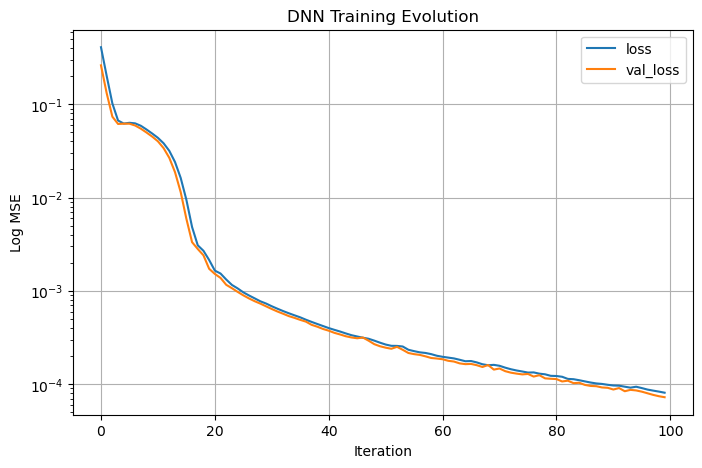

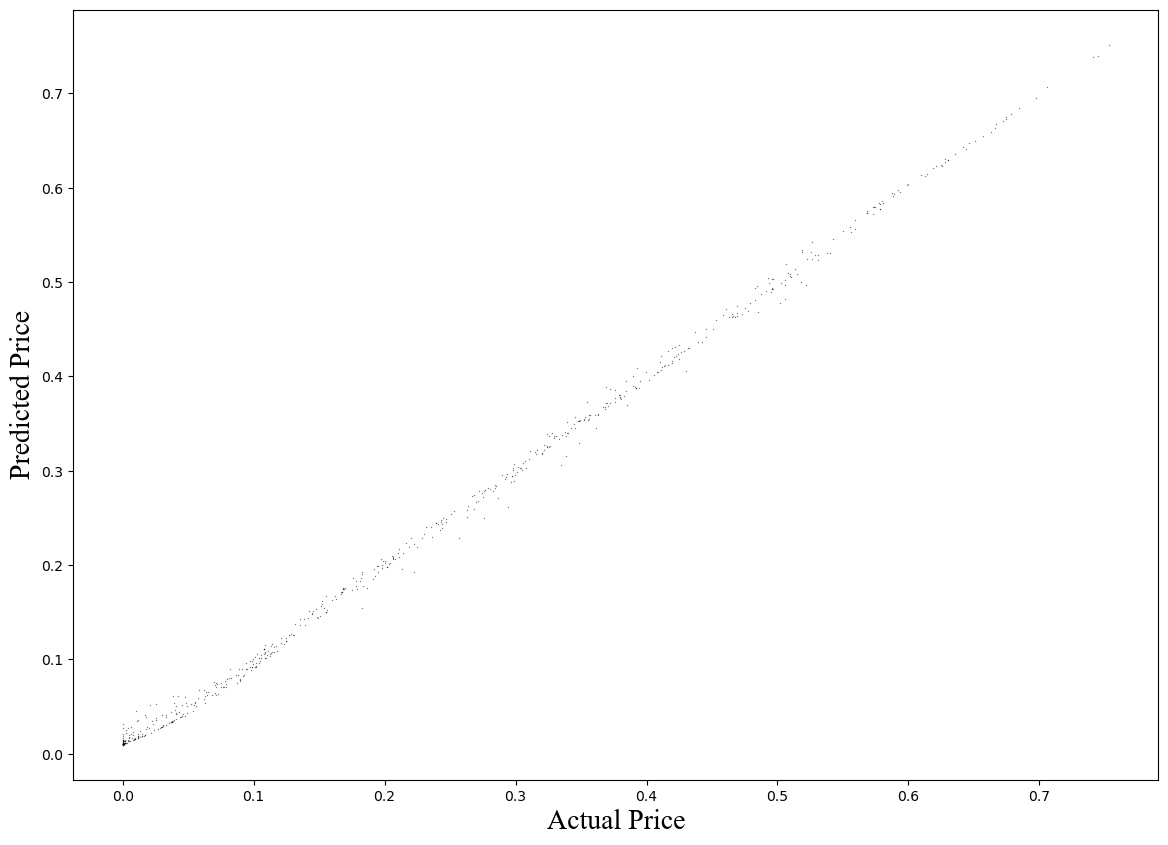

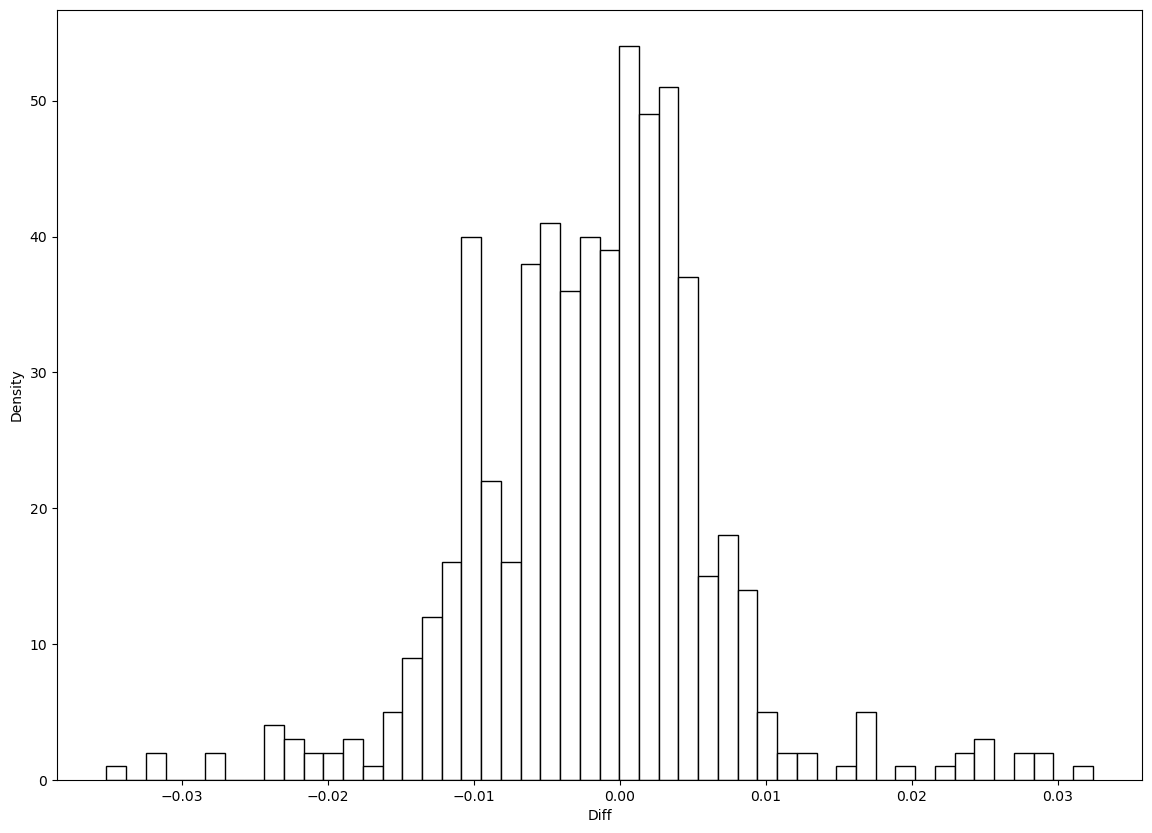

{'diff': array([ 4.18850123e-03,  1.43580978e-03,  1.34729864e-03,  3.69911306e-03,
         1.73679841e-04, -1.03165844e-03, -4.81380664e-03, -2.82821837e-03,
         8.40741665e-03, -5.25364614e-03,  3.64560235e-03,  2.92080237e-03,
        -5.79114558e-03,  1.85238352e-03,  7.71588341e-03, -9.91436560e-03,
         3.47288080e-03, -1.05250322e-02,  3.94848803e-03, -7.77322435e-03,
         4.52728598e-03, -1.92662494e-03, -1.11458348e-02, -6.24290981e-03,
         4.62656068e-03,  7.30877468e-03,  1.15925710e-03, -2.96539382e-03,
         5.26145402e-03, -9.98423586e-03,  2.81618792e-03,  1.05042520e-02,
         3.93038989e-03,  1.12060795e-03,  1.59900764e-03,  1.17155175e-02,
        -8.34267512e-03,  4.84840471e-03, -5.30657575e-03,  1.89218735e-03,
        -8.55248759e-03,  4.77707482e-04,  2.97570015e-03, -6.78885904e-03,
         2.27229046e-03,  2.42409646e-03, -9.27572652e-03, -7.55801027e-03,
        -1.84619424e-03, -6.67816752e-03, -1.12726046e-03, -6.14189892e-04,
    

In [169]:
y7_test_hat = NeuralNetwork(5, 50, 'relu', 'adam', 100).predict(X_test)

y7_test_hat = np.squeeze(y7_test_hat)

CheckAccuracy_plots(y_test, y7_test_hat)
CheckAccuracy_dict(y_test, y7_test_hat)

In [179]:
deep_5_50_relu = CheckAccuracy_dict(y_test, y7_test_hat)
deep_5_50_relu.pop('diff')
deep_5_50_relu = {'DNN (5, 50, relu)': deep_5_50_relu}
deep_5_50_relu

{'DNN (5, 50, relu)': {'mse': 7.239956087586735e-05,
  'rmse': 0.008508793150374932,
  'mae': 0.006209667862967868,
  'mpe': 0.03517666732718665}}

### DNN with 5 Layers of 60 Neurons Each (Activation: Relu, Nodes/Layer = 100)

Epoch 1/100
5/5 - 2s - loss: 0.5165 - val_loss: 0.2843 - 2s/epoch - 307ms/step
Epoch 2/100
5/5 - 0s - loss: 0.1881 - val_loss: 0.0842 - 43ms/epoch - 9ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0669 - val_loss: 0.0593 - 40ms/epoch - 8ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0645 - val_loss: 0.0687 - 40ms/epoch - 8ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0721 - val_loss: 0.0708 - 42ms/epoch - 8ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0717 - val_loss: 0.0667 - 41ms/epoch - 8ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0654 - val_loss: 0.0588 - 42ms/epoch - 8ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0570 - val_loss: 0.0511 - 41ms/epoch - 8ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0502 - val_loss: 0.0488 - 41ms/epoch - 8ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0480 - val_loss: 0.0465 - 40ms/epoch - 8ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0442 - val_loss: 0.0410 - 40ms/epoch - 8ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0391 - val_loss: 0.0356 - 40ms/epoch - 8ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0336 - val_loss: 

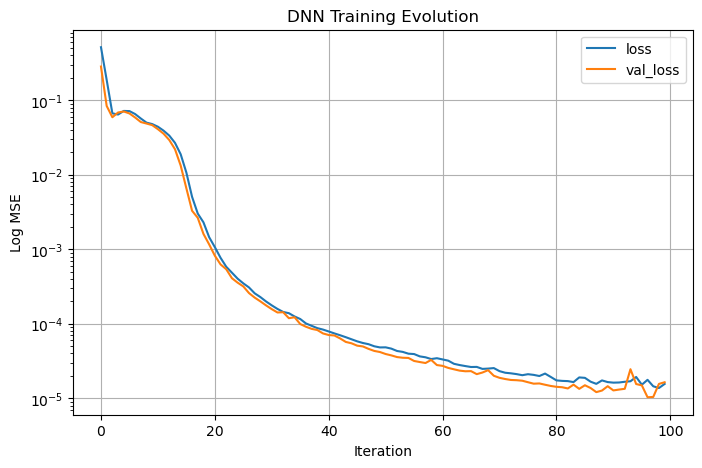

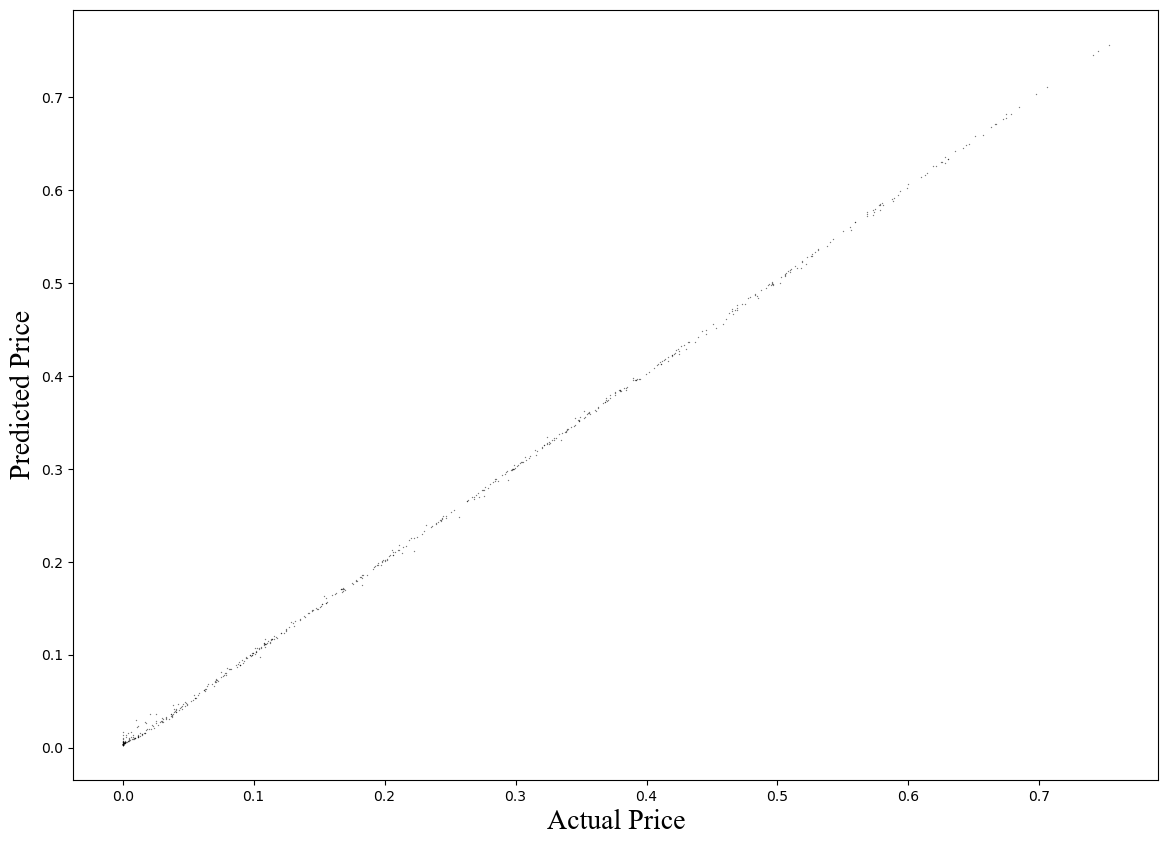

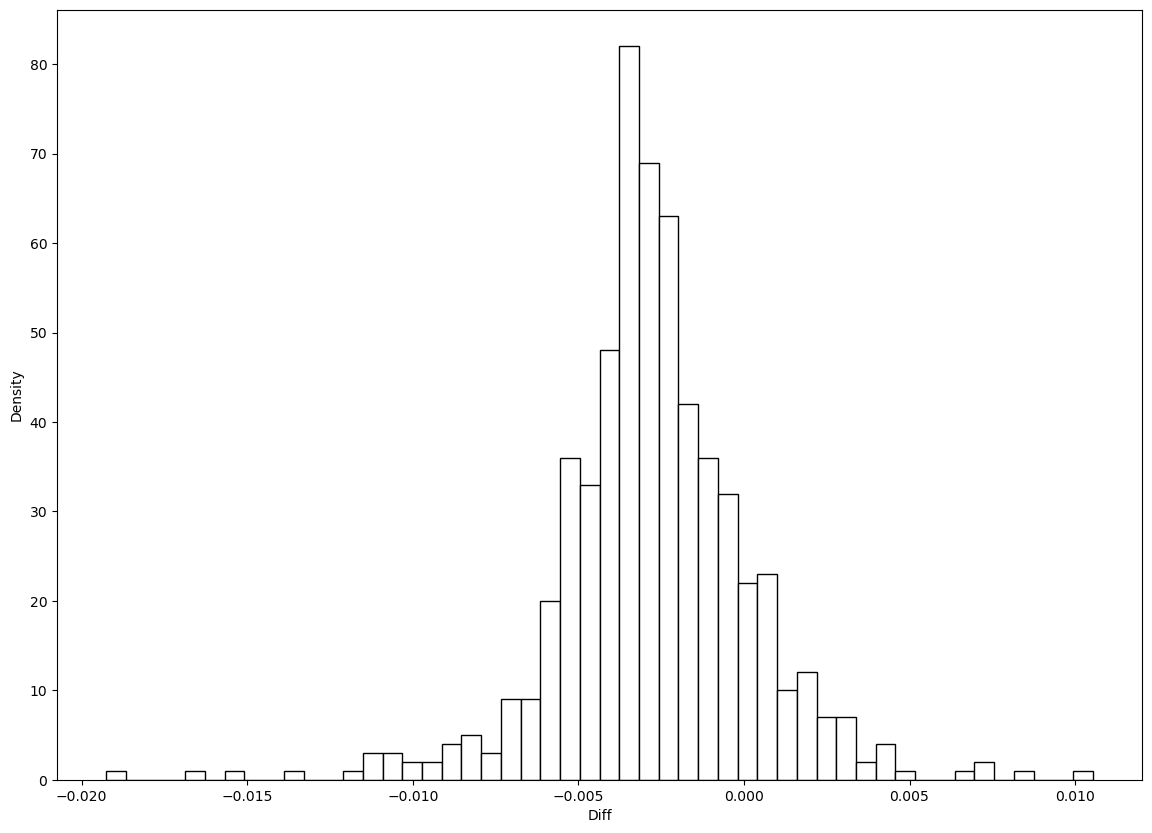

{'diff': array([-3.15964878e-03, -5.05579168e-03, -4.46656821e-03,  4.65628137e-04,
        -3.64745473e-03, -4.24309710e-03, -8.03609335e-03, -4.04057685e-03,
        -5.96445530e-03, -5.24893737e-03, -3.48597419e-03, -3.62143324e-03,
        -3.91073825e-03, -1.48929129e-03, -4.91994365e-03, -3.28100054e-03,
        -2.64309219e-03, -2.14182333e-03, -5.33994218e-03, -3.64978992e-03,
        -2.86276610e-03,  2.54053830e-03, -5.09348981e-03,  2.49507185e-05,
         2.54356834e-03, -2.99326092e-04,  3.30134143e-04, -4.07523231e-03,
        -3.72034278e-04, -3.14776192e-03, -2.48180073e-03, -7.18770071e-05,
        -2.49899923e-03,  1.42268615e-03, -4.67792770e-03, -2.73887703e-03,
        -2.38525327e-03, -3.44409149e-03, -2.34261558e-03,  1.92079385e-03,
        -3.20155464e-03, -2.89580365e-03, -2.25310242e-03, -1.20452781e-03,
        -4.70532728e-03, -2.37906188e-03, -3.62153166e-03, -1.98193568e-03,
        -2.67930326e-03, -6.63763637e-03, -3.71213509e-03, -4.98356798e-03,
    

In [171]:
y8_test_hat = NeuralNetwork(5, 100, 'relu', 'adam', 100).predict(X_test)

y8_test_hat = np.squeeze(y8_test_hat)

CheckAccuracy_plots(y_test, y8_test_hat)
CheckAccuracy_dict(y_test, y8_test_hat)

In [177]:
deep_5_100_relu = CheckAccuracy_dict(y_test, y8_test_hat)
deep_5_100_relu.pop('diff')
deep_5_100_relu = {'DNN (5, 100, relu)': deep_5_100_relu}
deep_5_100_relu

{'DNN (5, 100, relu)': {'mse': 1.6431392198317953e-05,
  'rmse': 0.004053565368699258,
  'mae': 0.0032889334117558212,
  'mpe': 0.01675806638423868}}

### Comparison of Key Accuracy Stats for Neural Networks Using Varying Number of Nodes Per Layer

In [181]:
question3 = {**deep_5_10_relu, **deep_5_50_relu, **deep_5_60_relu}
question3 = {**question3, **deep_5_100_relu}

df = pd.DataFrame.from_dict(question3)
df

,"DNN (5, 10, relu)","DNN (5, 50, relu)","DNN (5, 60, Relu)","DNN (5, 100, relu)"
mse,0.000731,0.000072,0.000014,0.000016
rmse,0.027037,0.008509,0.003757,0.004054
mae,0.020776,0.006210,0.002887,0.003289
mpe,0.111774,0.035177,0.015530,0.016758


## Part A: Question 4

### DNN with 5 Layers (Activation: Relu, Nodes/Layer = 60, rmsprop)

Epoch 1/100
5/5 - 1s - loss: 0.4238 - val_loss: 0.1840 - 917ms/epoch - 183ms/step
Epoch 2/100
5/5 - 0s - loss: 0.1279 - val_loss: 0.0762 - 40ms/epoch - 8ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0656 - val_loss: 0.0559 - 35ms/epoch - 7ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0533 - val_loss: 0.0497 - 35ms/epoch - 7ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0483 - val_loss: 0.0446 - 37ms/epoch - 7ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0427 - val_loss: 0.0378 - 34ms/epoch - 7ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0350 - val_loss: 0.0290 - 34ms/epoch - 7ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0256 - val_loss: 0.0195 - 34ms/epoch - 7ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0189 - val_loss: 0.0133 - 35ms/epoch - 7ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0133 - val_loss: 0.0149 - 35ms/epoch - 7ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0100 - val_loss: 0.0089 - 36ms/epoch - 7ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0083 - val_loss: 0.0060 - 36ms/epoch - 7ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0074 - val_los

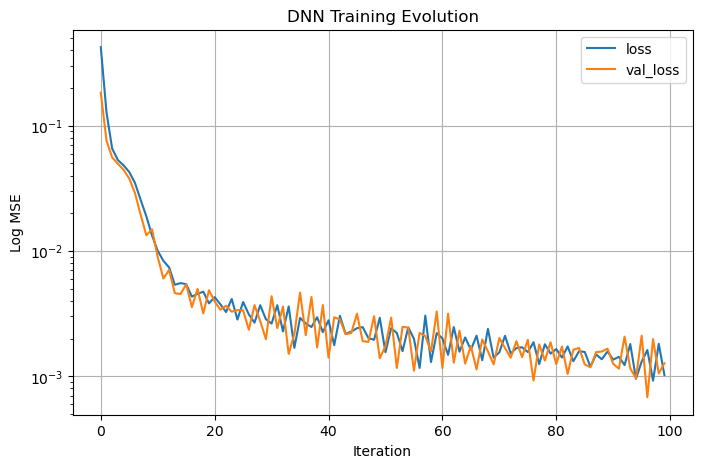

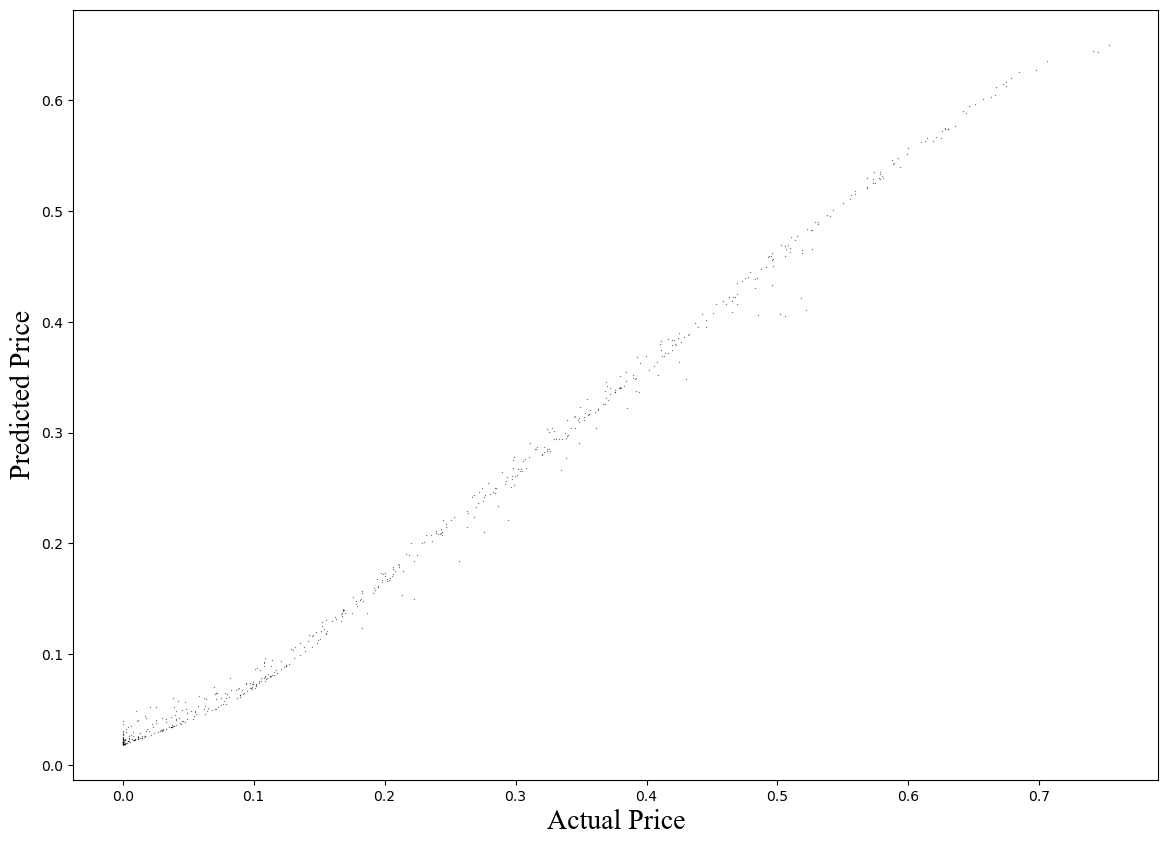

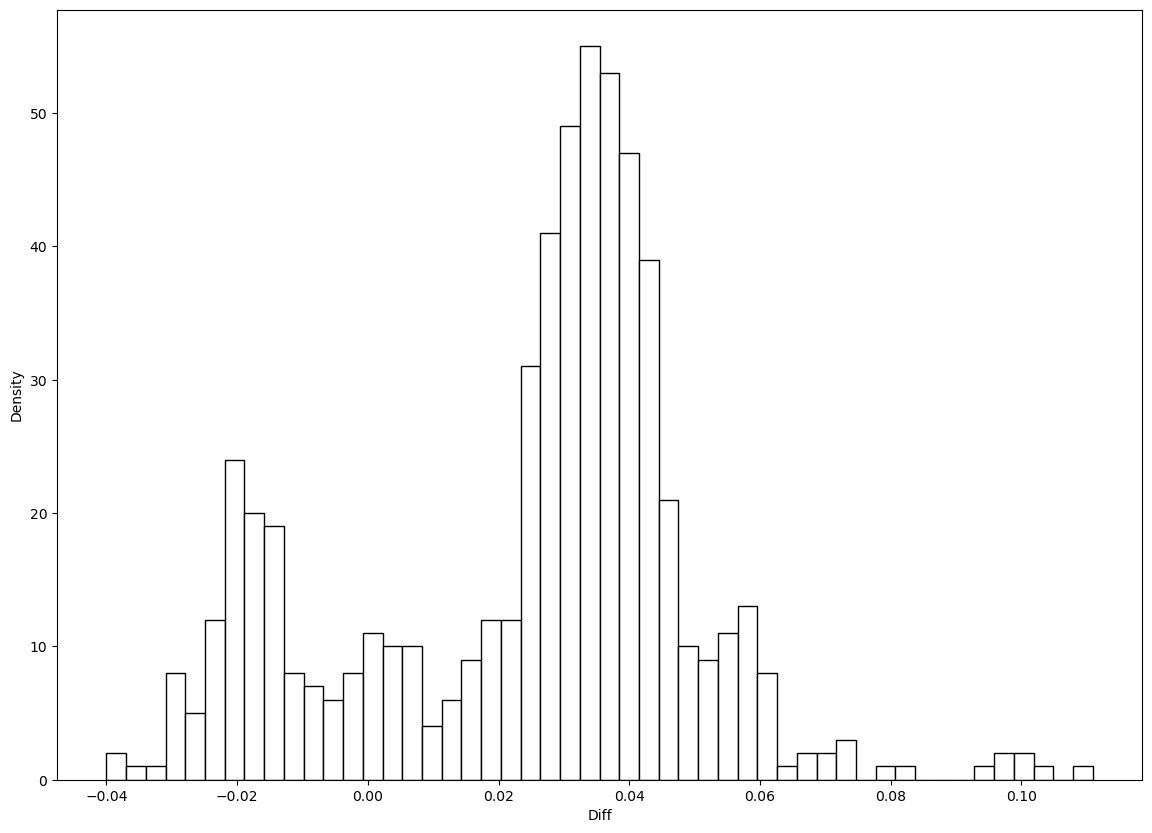

{'diff': array([ 0.05454304,  0.02850812,  0.03937354,  0.01152226,  0.05780481,
         0.04090063,  0.04759608,  0.0160917 ,  0.0367415 ,  0.04910519,
         0.03353677,  0.04369196,  0.03491918,  0.03282404,  0.04046974,
        -0.02023578,  0.04643439, -0.01519412,  0.05978159,  0.0289714 ,
         0.03378332, -0.00029349,  0.03387537,  0.03227105,  0.00965295,
         0.0199795 , -0.00113158,  0.03281437,  0.01875897,  0.04175629,
         0.0366281 ,  0.0261506 ,  0.03459819, -0.00195856,  0.03990533,
         0.04863343, -0.01618192,  0.04464187,  0.02946779, -0.00076041,
        -0.0162851 ,  0.02551471,  0.03197022, -0.01410186,  0.09608195,
         0.02988539, -0.01735082, -0.01518622,  0.03259262,  0.04743224,
         0.05087928,  0.05845139,  0.01316125,  0.02716532,  0.03811376,
         0.03803986,  0.03399538,  0.02128045, -0.01290647,  0.03461781,
        -0.02026695,  0.0441046 , -0.01136083, -0.01696206,  0.00050244,
        -0.03669475,  0.02015218,  0.006018

In [182]:
y9_test_hat = NeuralNetwork(5, 60, 'relu', 'rmsprop', 100).predict(X_test)

y9_test_hat = np.squeeze(y9_test_hat)

CheckAccuracy_plots(y_test, y9_test_hat)
CheckAccuracy_dict(y_test, y9_test_hat)

In [183]:
deep_5_60_relu_rms = CheckAccuracy_dict(y_test, y9_test_hat)
deep_5_60_relu_rms.pop('diff')
deep_5_60_relu_rms = {'DNN (5, 60, relu, rms)': deep_5_60_relu_rms}
deep_5_60_relu_rms

{'DNN (5, 60, relu, rms)': {'mse': 0.0012701402125895912,
  'rmse': 0.035639026538186916,
  'mae': 0.031645175886932275,
  'mpe': 0.14733724962432962}}

### DNN with 5 Layers (Activation: Relu, Nodes/Layer = 60, sgd)

Epoch 1/100
5/5 - 1s - loss: 0.4727 - val_loss: 0.3656 - 726ms/epoch - 145ms/step
Epoch 2/100
5/5 - 0s - loss: 0.3194 - val_loss: 0.2679 - 36ms/epoch - 7ms/step
Epoch 3/100
5/5 - 0s - loss: 0.2396 - val_loss: 0.2090 - 39ms/epoch - 8ms/step
Epoch 4/100
5/5 - 0s - loss: 0.1895 - val_loss: 0.1698 - 35ms/epoch - 7ms/step
Epoch 5/100
5/5 - 0s - loss: 0.1554 - val_loss: 0.1418 - 35ms/epoch - 7ms/step
Epoch 6/100
5/5 - 0s - loss: 0.1308 - val_loss: 0.1212 - 35ms/epoch - 7ms/step
Epoch 7/100
5/5 - 0s - loss: 0.1128 - val_loss: 0.1060 - 36ms/epoch - 7ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0994 - val_loss: 0.0945 - 38ms/epoch - 8ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0892 - val_loss: 0.0857 - 35ms/epoch - 7ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0814 - val_loss: 0.0788 - 37ms/epoch - 7ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0753 - val_loss: 0.0735 - 37ms/epoch - 7ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0705 - val_loss: 0.0691 - 35ms/epoch - 7ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0667 - val_los

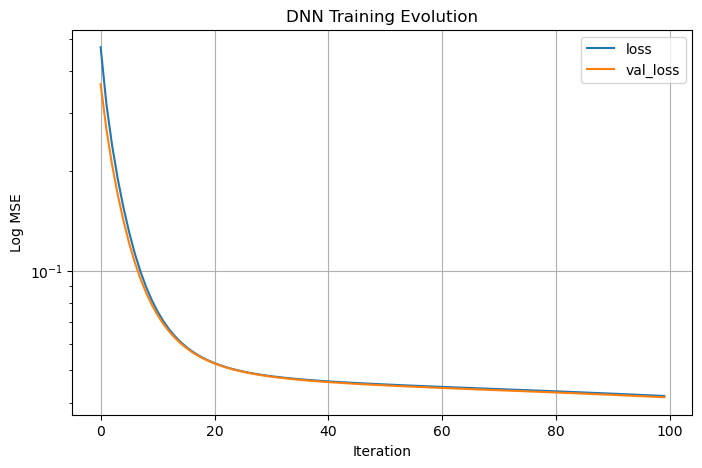

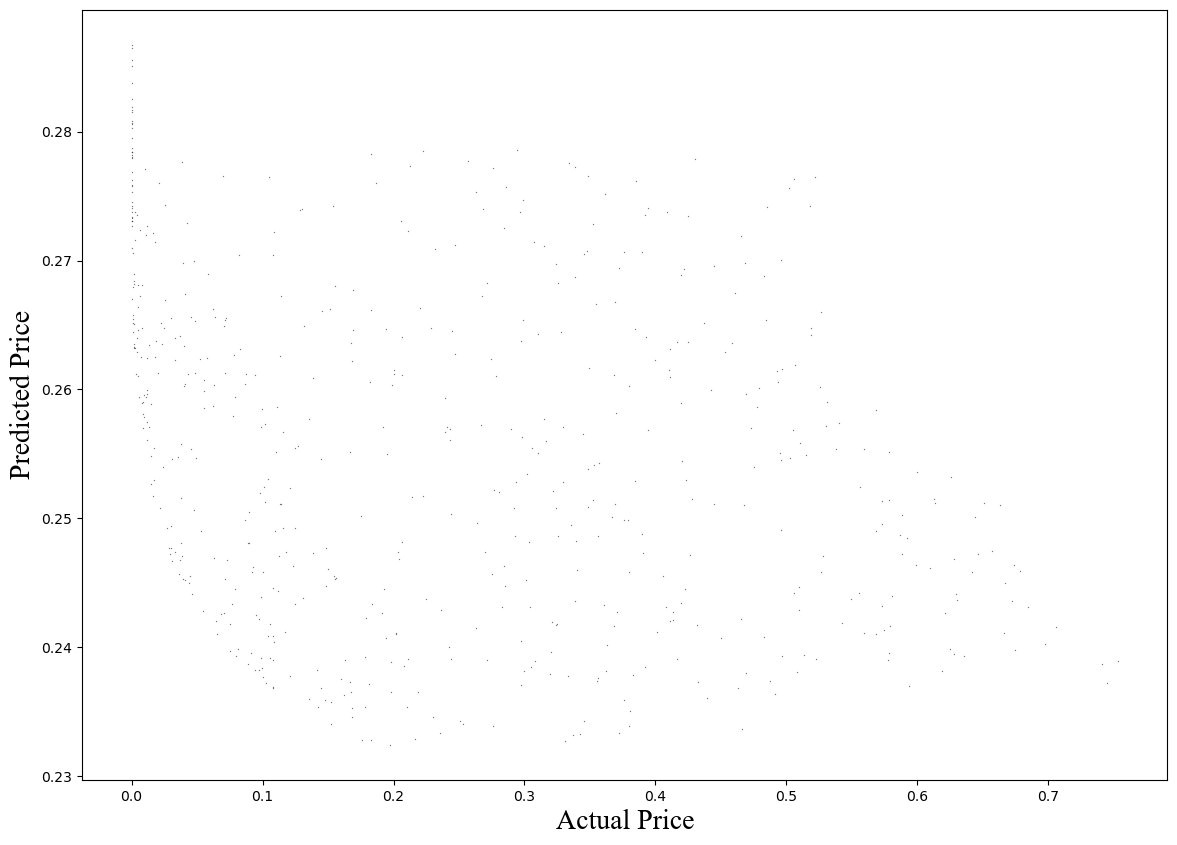

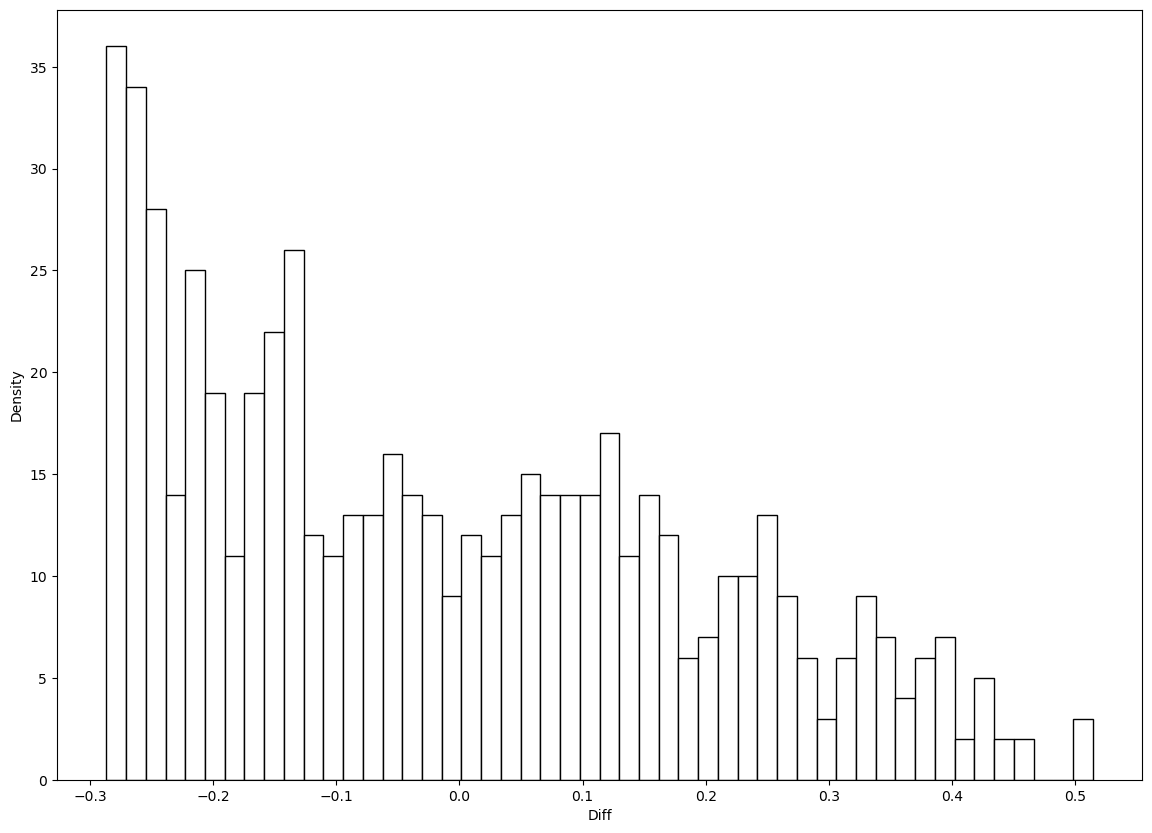

{'diff': array([ 0.11848077,  0.1193318 ,  0.11850549, -0.19675061,  0.43240466,
         0.11664657,  0.31018387, -0.16220196,  0.21886552,  0.3331661 ,
         0.24832389,  0.16465093,  0.07632945, -0.04608701,  0.27350232,
        -0.28506351,  0.26166712, -0.24996109,  0.41193021, -0.09381634,
         0.02116704, -0.21983829,  0.23131275, -0.09832876, -0.20288036,
        -0.18025368, -0.21587756,  0.02464372, -0.17465484,  0.15226971,
         0.02952205, -0.16117219, -0.05167884, -0.21918628,  0.2464995 ,
        -0.01215695, -0.25600655,  0.21635847,  0.06058859, -0.21752057,
        -0.2580832 , -0.14030331, -0.12390943, -0.25080276,  0.50197676,
        -0.13158335, -0.26182888, -0.25360743, -0.05606256,  0.33790795,
         0.39883108,  0.44126204, -0.18445373, -0.11720757,  0.10416947,
         0.17200562,  0.24156382, -0.1667509 , -0.23967161, -0.04147759,
        -0.27306892,  0.34371106, -0.24393085, -0.26127101, -0.21850464,
        -0.27818302, -0.17199652, -0.205671

In [185]:
y10_test_hat = NeuralNetwork(5, 60, 'relu', 'sgd', 100).predict(X_test)

y10_test_hat = np.squeeze(y10_test_hat)

CheckAccuracy_plots(y_test, y10_test_hat)
CheckAccuracy_dict(y_test, y10_test_hat)

In [189]:
deep_5_60_relu_sgd = CheckAccuracy_dict(y_test, y10_test_hat)
deep_5_60_relu_sgd.pop('diff')
deep_5_60_relu_sgd = {'DNN (5, 60, relu, sgd)': deep_5_60_relu_sgd}
deep_5_60_relu_sgd

{'DNN (5, 60, relu, sgd)': {'mse': 0.04152356982967547,
  'rmse': 0.20377332953474425,
  'mae': 0.1757642383772786,
  'mpe': 0.8424304712215294}}

### Comparison of Key Accuracy Stats for Neural Networks Using Various Optimizers

In [190]:
question4 = {**deep_5_60_relu, **deep_5_60_relu_rms, **deep_5_60_relu_sgd}

df = pd.DataFrame.from_dict(question4)
df

,"DNN (5, 60, Relu)","DNN (5, 60, relu, rms)","DNN (5, 60, relu, sgd)"
mse,0.000014,0.001270,0.041524
rmse,0.003757,0.035639,0.203773
mae,0.002887,0.031645,0.175764
mpe,0.015530,0.147337,0.842430


## Part A: Question 5

### Comparison of Key Accuracy Stats for Neural Networks Using Various Optimizers

Epoch 1/500
5/5 - 1s - loss: 0.6062 - val_loss: 0.4387 - 1s/epoch - 246ms/step
Epoch 2/500
5/5 - 0s - loss: 0.3589 - val_loss: 0.2504 - 37ms/epoch - 7ms/step
Epoch 3/500
5/5 - 0s - loss: 0.1857 - val_loss: 0.1083 - 39ms/epoch - 8ms/step
Epoch 4/500
5/5 - 0s - loss: 0.0794 - val_loss: 0.0554 - 36ms/epoch - 7ms/step
Epoch 5/500
5/5 - 0s - loss: 0.0538 - val_loss: 0.0561 - 34ms/epoch - 7ms/step
Epoch 6/500
5/5 - 0s - loss: 0.0599 - val_loss: 0.0614 - 35ms/epoch - 7ms/step
Epoch 7/500
5/5 - 0s - loss: 0.0634 - val_loss: 0.0612 - 37ms/epoch - 7ms/step
Epoch 8/500
5/5 - 0s - loss: 0.0615 - val_loss: 0.0571 - 35ms/epoch - 7ms/step
Epoch 9/500
5/5 - 0s - loss: 0.0566 - val_loss: 0.0523 - 35ms/epoch - 7ms/step
Epoch 10/500
5/5 - 0s - loss: 0.0515 - val_loss: 0.0492 - 36ms/epoch - 7ms/step
Epoch 11/500
5/5 - 0s - loss: 0.0488 - val_loss: 0.0486 - 36ms/epoch - 7ms/step
Epoch 12/500
5/5 - 0s - loss: 0.0480 - val_loss: 0.0477 - 37ms/epoch - 7ms/step
Epoch 13/500
5/5 - 0s - loss: 0.0466 - val_loss: 

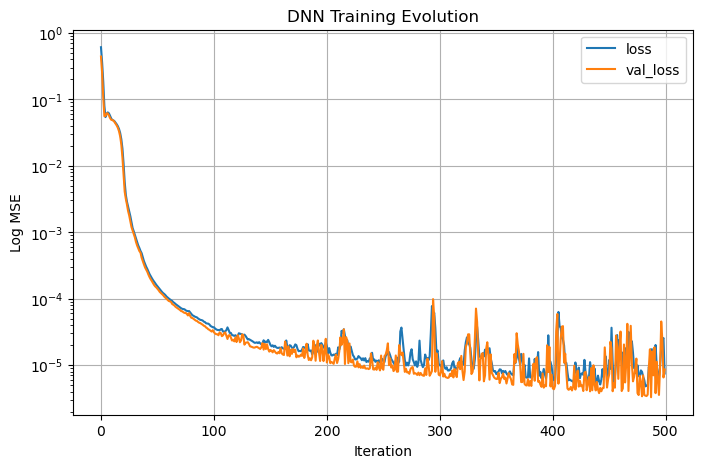

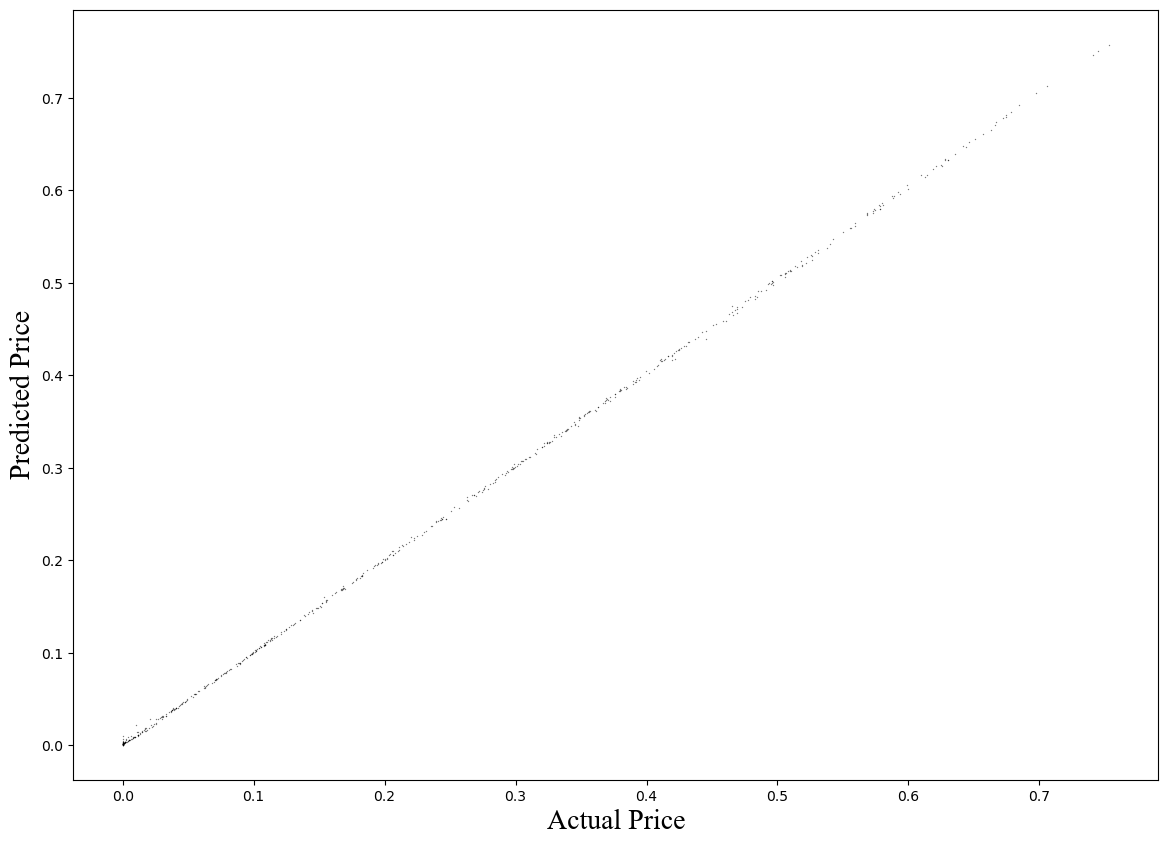

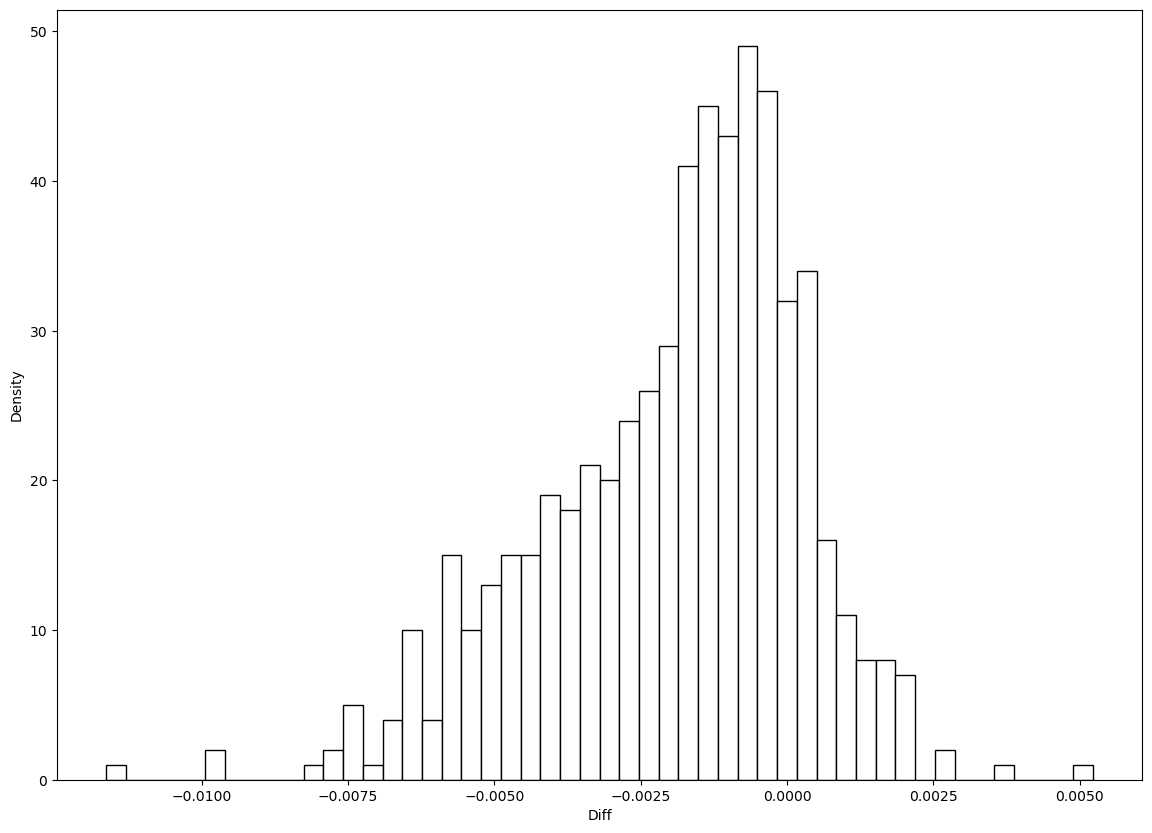

{'diff': array([-6.42127400e-04, -5.46634848e-03, -4.93473289e-03,  1.44321519e-05,
        -6.49917935e-03, -3.45685223e-03, -7.36482584e-03,  6.41122132e-04,
        -3.62759560e-03, -4.69759441e-03, -5.47510039e-03, -2.25997375e-03,
        -6.02050425e-03, -1.88599000e-03, -2.03400596e-03, -6.71199174e-04,
        -3.56142095e-03,  1.62825148e-03, -2.57816096e-03, -3.67999458e-03,
        -2.62160571e-03,  5.35624312e-04, -6.42166011e-03,  5.12546515e-04,
         1.97782841e-04, -7.39454239e-04, -1.03178356e-03, -3.28088121e-03,
         2.65109572e-04,  3.72152438e-03, -1.00089353e-03,  2.98126276e-04,
        -2.64295935e-03, -1.24179607e-03, -6.82441016e-03, -5.60839364e-03,
        -2.66186145e-04, -2.96162169e-03, -3.35935161e-03, -8.74745947e-04,
        -9.34917126e-04, -3.71107363e-04,  5.82514053e-04,  1.88640469e-05,
        -5.88621450e-03,  1.76256296e-04, -1.26934449e-03, -3.41057525e-04,
        -1.61722276e-04, -6.74999112e-03, -6.25778986e-03, -8.04164389e-03,
    

In [191]:
y11_test_hat = NeuralNetwork(5, 60, 'relu', 'adam', 500).predict(X_test)

y11_test_hat = np.squeeze(y11_test_hat)

CheckAccuracy_plots(y_test, y11_test_hat)
CheckAccuracy_dict(y_test, y11_test_hat)

In [197]:
deep_5_60_relu_adam_500 = CheckAccuracy_dict(y_test, y11_test_hat)
deep_5_60_relu_adam_500.pop('diff')
deep_5_60_relu_adam_500 = {'DNN (5, 60, relu, adam, 500 epochs)': deep_5_60_relu_adam_500}
deep_5_60_relu_adam_500

{'DNN (5, 60, relu, adam, 500 epochs)': {'mse': 8.567964312912078e-06,
  'rmse': 0.002927108524279904,
  'mae': 0.0022070382172028223,
  'mpe': 0.012101119508896432}}

Epoch 1/1000
5/5 - 1s - loss: 0.6078 - val_loss: 0.4683 - 1s/epoch - 242ms/step
Epoch 2/1000
5/5 - 0s - loss: 0.3957 - val_loss: 0.2962 - 39ms/epoch - 8ms/step
Epoch 3/1000
5/5 - 0s - loss: 0.2344 - val_loss: 0.1500 - 35ms/epoch - 7ms/step
Epoch 4/1000
5/5 - 0s - loss: 0.1107 - val_loss: 0.0695 - 38ms/epoch - 8ms/step
Epoch 5/1000
5/5 - 0s - loss: 0.0618 - val_loss: 0.0565 - 36ms/epoch - 7ms/step
Epoch 6/1000
5/5 - 0s - loss: 0.0592 - val_loss: 0.0607 - 53ms/epoch - 11ms/step
Epoch 7/1000
5/5 - 0s - loss: 0.0628 - val_loss: 0.0609 - 36ms/epoch - 7ms/step
Epoch 8/1000
5/5 - 0s - loss: 0.0610 - val_loss: 0.0563 - 37ms/epoch - 7ms/step
Epoch 9/1000
5/5 - 0s - loss: 0.0550 - val_loss: 0.0498 - 35ms/epoch - 7ms/step
Epoch 10/1000
5/5 - 0s - loss: 0.0484 - val_loss: 0.0447 - 36ms/epoch - 7ms/step
Epoch 11/1000
5/5 - 0s - loss: 0.0437 - val_loss: 0.0414 - 36ms/epoch - 7ms/step
Epoch 12/1000
5/5 - 0s - loss: 0.0396 - val_loss: 0.0358 - 35ms/epoch - 7ms/step
Epoch 13/1000
5/5 - 0s - loss: 0.033

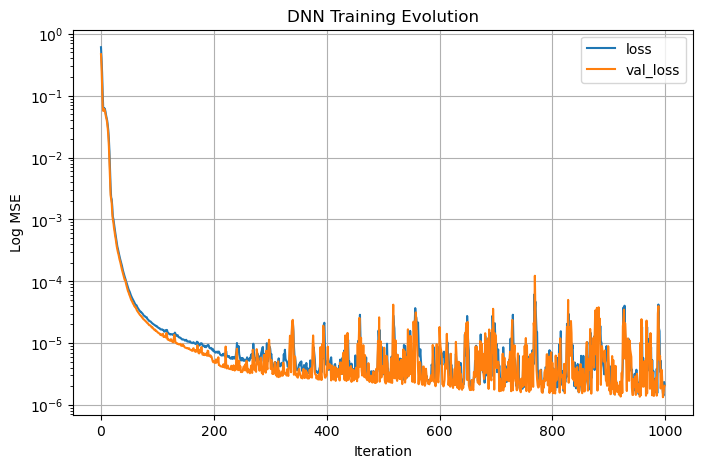

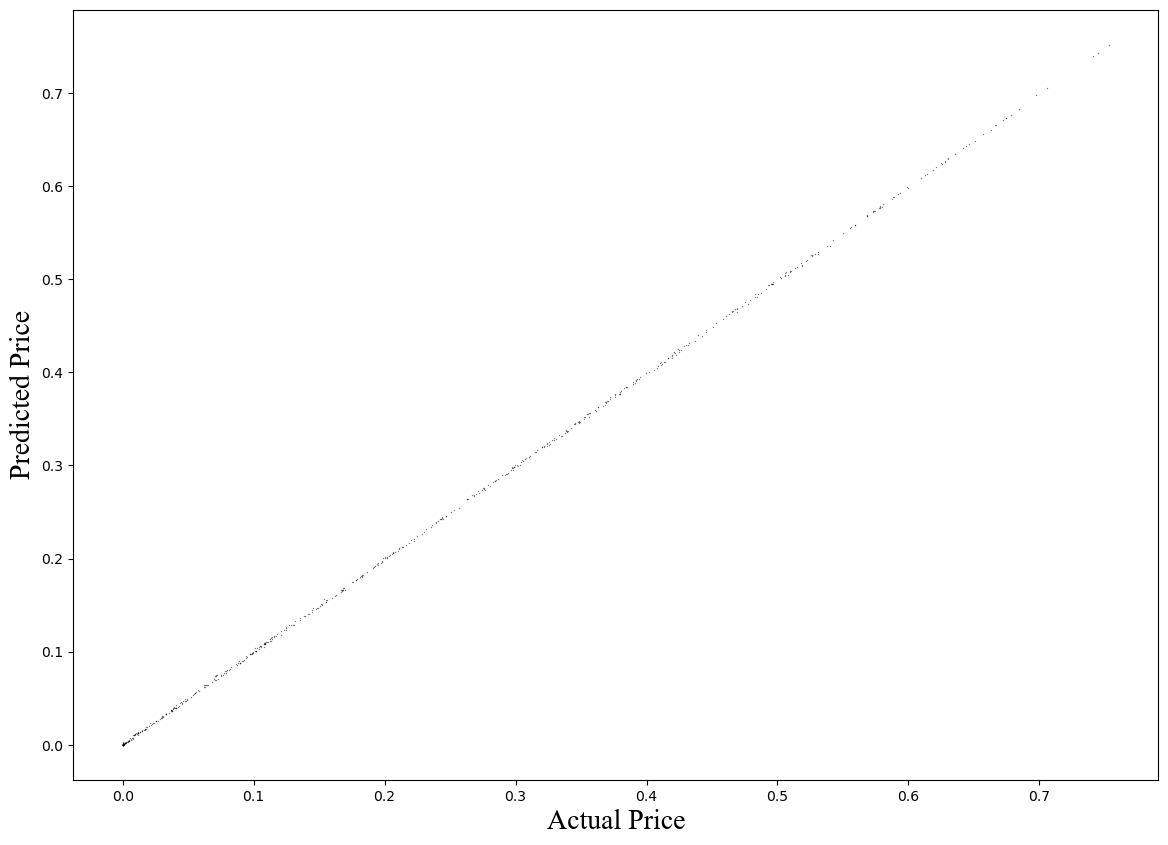

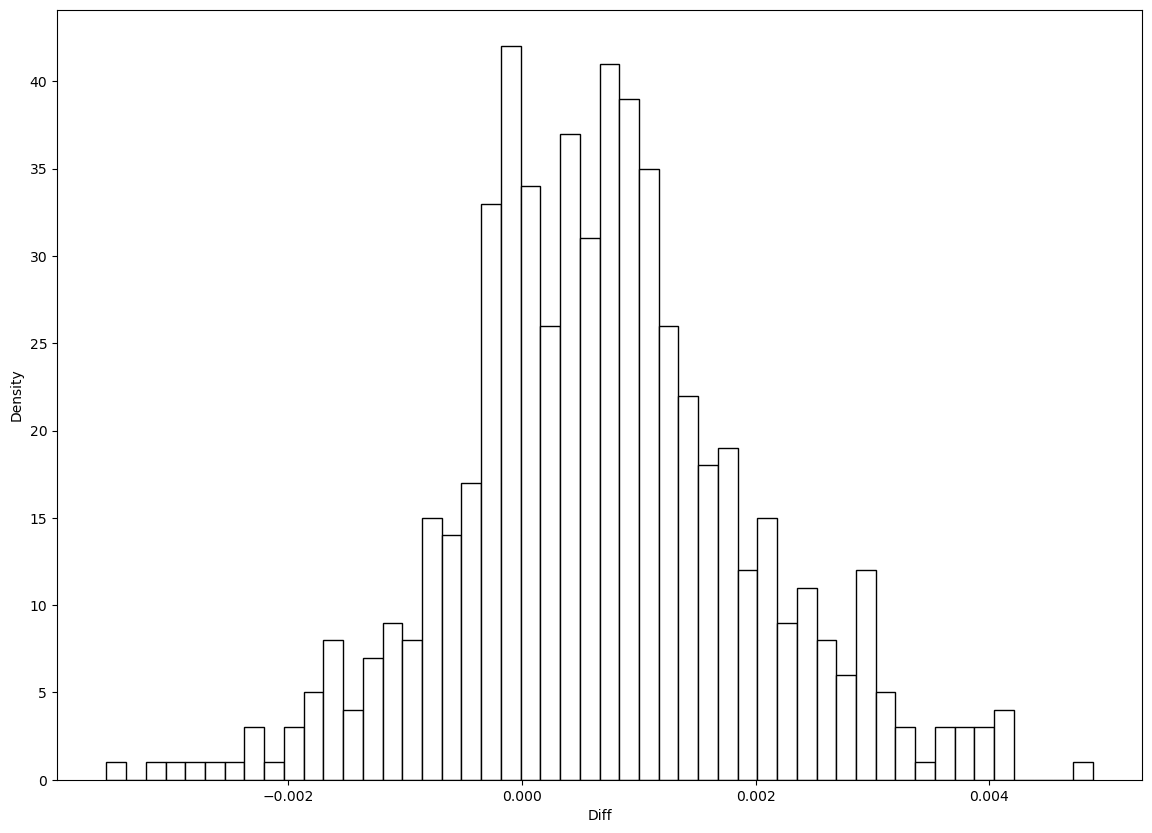

{'diff': array([ 1.27276122e-03,  2.55929773e-03,  2.56474037e-04, -2.26676799e-03,
         1.52873184e-03,  2.59024760e-03,  2.40548023e-04,  2.71663782e-03,
         4.12220032e-03,  1.17358231e-03,  1.30921948e-03,  3.10930206e-03,
         1.79032682e-03,  1.54628386e-03,  4.13429991e-03, -4.45228361e-05,
         1.03522965e-03, -1.95683251e-04,  2.78130988e-03,  3.83964831e-05,
        -7.45400501e-04,  1.05488135e-03, -9.26141666e-04,  2.72463880e-03,
        -6.35613028e-04,  3.18304688e-04,  1.12343925e-05,  2.86394044e-03,
         9.54511795e-04,  1.42534484e-03,  3.78664194e-05,  1.54772275e-03,
         1.03041530e-03,  5.60268412e-04,  1.27872208e-03, -1.23606512e-03,
        -2.16370166e-04, -1.13920381e-04,  5.24904276e-04,  4.71626121e-04,
        -1.13613085e-04, -1.71502753e-06,  7.91756159e-04, -1.96247258e-03,
         8.39514010e-04, -1.15132357e-05,  1.16799362e-04, -1.56709573e-03,
         1.13961103e-03,  1.92796832e-03,  1.26556801e-03,  1.76302216e-03,
    

In [194]:
y12_test_hat = NeuralNetwork(5, 60, 'relu', 'adam', 1000).predict(X_test)

y12_test_hat = np.squeeze(y12_test_hat)

CheckAccuracy_plots(y_test, y12_test_hat)
CheckAccuracy_dict(y_test, y12_test_hat)

In [199]:
deep_5_60_relu_adam_1000 = CheckAccuracy_dict(y_test, y12_test_hat)
deep_5_60_relu_adam_1000.pop('diff')
deep_5_60_relu_adam_1000 = {'DNN (5, 60, relu, adam, 1000 epochs)': deep_5_60_relu_adam_1000}
deep_5_60_relu_adam_1000

{'DNN (5, 60, relu, adam, 1000 epochs)': {'mse': 2.0354112564970442e-06,
  'rmse': 0.0014266783998144236,
  'mae': 0.0010943590099495887,
  'mpe': 0.005898109234321153}}

### Comparison of Key Accuracy Stats for Neural Networks Running Varying Epochs

In [200]:
question4 = {**deep_5_60_relu, **deep_5_60_relu_adam_500, **deep_5_60_relu_adam_1000}

df = pd.DataFrame.from_dict(question4)
df

,"DNN (5, 60, Relu)","DNN (5, 60, relu, adam, 500 epochs)","DNN (5, 60, relu, adam, 1000 epochs)"
mse,0.000014,0.000009,0.000002
rmse,0.003757,0.002927,0.001427
mae,0.002887,0.002207,0.001094
mpe,0.015530,0.012101,0.005898
